
# FUEL TREND ANALYSIS: UTILIZING ADVANCED MACHINE LEARNING FOR PREDICTIVE FUEL PRICING IN KENYA"




### BUSINESS UNDERSTANDING

### DATA UNDERSTANDING



In [3]:
# Import library
import pandas as pd

In [4]:
# Import the relevant data sets
epra_data = pd.read_excel('Epra_Data1.xlsx')
exchange_rate_data = pd.read_excel('Key CBK Indicative Exchange Rates.xlsx')

In [5]:
# Preview the EPRA fuel data set
epra_data.head()


Date             Town  Super Diesel Kerosene
0 2011-01-01          MOMBASA  92.53  85.59    74.41
1 2011-01-01  LIKONI MAINLAND  92.86  85.92    74.74
2 2011-01-01           KILIFI  92.71  85.77     74.6
3 2011-01-01          MALINDI  93.29  86.35    75.18
4 2011-01-01            KWALE  92.87  85.93    74.75

In [6]:
# Look at the EPRA fuel data structure
epra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20428 entries, 0 to 20427
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20275 non-null  datetime64[ns]
 1   Town      20271 non-null  object        
 2   Super     16229 non-null  object        
 3   Diesel    16229 non-null  object        
 4   Kerosene  16228 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 798.1+ KB


In [7]:
# Check for missing values
print (epra_data.isnull().sum())

print("\n..................Percentage of missing values.............")

epra_data.isnull().mean() * 100

Date         153
Town         157
Super       4199
Diesel      4199
Kerosene    4200
dtype: int64

..................Percentage of missing values.............


Date         0.748972
Town         0.768553
Super       20.555120
Diesel      20.555120
Kerosene    20.560016
dtype: float64

In [8]:
# Drop all missing values
epra_data = epra_data.dropna()

# Confirm no missing data
epra_data.isnull().sum()

Date        0
Town        0
Super       0
Diesel      0
Kerosene    0
dtype: int64

In [9]:
#  Check the structure
epra_data.shape

(16227, 5)

In [10]:
# Preview the Dollar dataset
exchange_rate_data.head()

Date   Currency      Mean       Buy      Sell
0  29/12/2023  US DOLLAR  156.4618  156.0118  156.9118
1  28/12/2023  US DOLLAR  156.0941  155.6588  156.5294
2  27/12/2023  US DOLLAR  155.4706  155.1029  155.8382
3  22/12/2023  US DOLLAR  155.0853  154.7294  155.4412
4  21/12/2023  US DOLLAR  154.6853  154.3529  155.0176

In [11]:
# Check  the structure of the Dollar dataset
exchange_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3275 non-null   object 
 1   Currency  3275 non-null   object 
 2   Mean      3275 non-null   float64
 3   Buy       3275 non-null   float64
 4   Sell      3275 non-null   float64
dtypes: float64(3), object(2)
memory usage: 128.1+ KB


In [12]:
exchange_rate_data.tail(10)

Date   Currency     Mean      Buy     Sell
3265  14/01/2011  US DOLLAR  80.7431  80.6611  80.8250
3266  13/01/2011  US DOLLAR  80.9417  80.8500  81.0333
3267  12/01/2011  US DOLLAR  81.0708  80.9833  81.1583
3268  11/01/2011  US DOLLAR  81.2181  81.1361  81.3000
3269  10/01/2011  US DOLLAR  81.1747  81.0844  81.2650
3270  07/01/2011  US DOLLAR  81.1444  81.0611  81.2278
3271  06/01/2011  US DOLLAR  81.1322  81.0472  81.2172
3272  05/01/2011  US DOLLAR  80.9389  80.8417  81.0361
3273  04/01/2011  US DOLLAR  80.9950  80.8978  81.0922
3274  03/01/2011  US DOLLAR  80.7961  80.7239  80.8683

In [13]:
#  Change the Date column into Datetime format
exchange_rate_data['Date'] = pd.to_datetime(exchange_rate_data['Date'], dayfirst=True)
exchange_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3275 non-null   datetime64[ns]
 1   Currency  3275 non-null   object        
 2   Mean      3275 non-null   float64       
 3   Buy       3275 non-null   float64       
 4   Sell      3275 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 128.1+ KB


In [14]:
# Extracting year and month from the Date column for both datasets
epra_data['YearMonth'] = epra_data['Date'].dt.to_period('M')
exchange_rate_data['YearMonth'] = exchange_rate_data['Date'].dt.to_period('M')

# Calculating the average dollar price per month in the exchange rate dataset
average_dollar_price_per_month = exchange_rate_data.groupby('YearMonth')['Mean'].mean()

# Merging the average dollar price with the epra_data
epra_data = epra_data.merge(average_dollar_price_per_month, on='YearMonth', how='left')

# Renaming the merged column to 'Average Exchange Rate'
epra_data.rename(columns={'Mean': 'Average Exchange Rate'}, inplace=True)

# Preview the updated epra_data
epra_data



Date             Town   Super  Diesel Kerosene YearMonth  \
0     2011-01-01          MOMBASA   92.53   85.59    74.41   2011-01   
1     2011-01-01  LIKONI MAINLAND   92.86   85.92    74.74   2011-01   
2     2011-01-01           KILIFI   92.71   85.77     74.6   2011-01   
3     2011-01-01          MALINDI   93.29   86.35    75.18   2011-01   
4     2011-01-01            KWALE   92.87   85.93    74.75   2011-01   
...          ...              ...     ...     ...      ...       ...   
16222 2023-12-01           Keumbu  213.13  202.66   200.24   2023-12   
16223 2023-12-01           Marani  212.81  202.33   199.93   2023-12   
16224 2023-12-01           Kerina   213.2  202.73   200.31   2023-12   
16225 2023-12-01           Ikonge  212.51  202.03   199.61   2023-12   
16226 2023-12-01       Nyansiongo  212.94  202.46   200.04   2023-12   

       Average Exchange Rate  
0                  81.029071  
1                  81.029071  
2                  81.029071  
3                  81.029071  
4                  81.029071  
...                      ...  
16222             154.090606  
16223             154.090606  
16224             154.090606  
16225             154.090606  
16226             154.090606  

[16227 rows x 7 columns]

The function calculates the average US dollar exchange rate for each period in which fuel prices were recorded, and then adds this information to the fuel price data. It does so by selecting daily exchange rates that fall within each fuel price period, averaging them, and attaching this average rate to the corresponding period.

In [15]:
# Put the data in a final csv document
final_data = epra_data[['Date', 'Town', 'Super', 'Diesel', 'Kerosene', 'Average Exchange Rate']]
final_data.to_csv('final_data.csv', index=False)

# Data Pre-processing

In [16]:
# Preview the final dataset
df = pd.read_csv('final_data.csv')
df.head()

Date             Town  Super Diesel Kerosene  Average Exchange Rate
0  2011-01-01          MOMBASA  92.53  85.59    74.41              81.029071
1  2011-01-01  LIKONI MAINLAND  92.86  85.92    74.74              81.029071
2  2011-01-01           KILIFI  92.71  85.77     74.6              81.029071
3  2011-01-01          MALINDI  93.29  86.35    75.18              81.029071
4  2011-01-01            KWALE  92.87  85.93    74.75              81.029071

### Data Inspection

In [17]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16227 entries, 0 to 16226
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   16227 non-null  object 
 1   Town                   16227 non-null  object 
 2   Super                  16227 non-null  object 
 3   Diesel                 16227 non-null  object 
 4   Kerosene               16227 non-null  object 
 5   Average Exchange Rate  16227 non-null  float64
dtypes: float64(1), object(5)
memory usage: 760.8+ KB


### Clearing White Space

In [18]:
# Checking for white spaces in the Super Column
numbers_with_spaces = df[df['Super'].str.contains('\s', na=False)]
numbers_with_spaces.head()


Date      Town     Super  Diesel Kerosene  Average Exchange Rate
1163  2012-09-01  KAKAMEGA   1 10.80  103.13    81.52                84.6133
1164  2012-09-01     BONDO   1 11.00  103.33     8172                84.6133
1165  2012-09-01     SIAYA   11 1.05  103.38     8177                84.6133
1166  2012-09-01   KERICHO  1 11 .18  103.51     8189                84.6133
1168  2012-09-01    KEROKA   11 1.59  103.92    82.31                84.6133

In [19]:
# Checking for white spaces in the Diesel Column
numbers_with_spaces = df[df['Diesel'].str.contains('\s', na=False)]
numbers_with_spaces

Date      Town   Super                 Diesel Kerosene  \
7478   2019-12-01   MALINDI  108.29  100.58         101.10    101.1   
13435  2022-12-01    Kaiboi  177.55                I 62.77   146.73   
13466  2022-12-01  Kaplamai  177.92                163.1 4   147.08   

       Average Exchange Rate  
7478              101.501068  
13435             122.934521  
13466             122.934521

In [20]:
# Checking for white spaces in Kerosene Column
numbers_with_spaces = df[df['Kerosene'].str.contains('\s', na=False)]
numbers_with_spaces

Date     Town   Super  Diesel Kerosene  Average Exchange Rate
13348  2022-12-01    Thika  177.31  162.01  14  .94             122.934521
13404  2022-12-01     Molo  176.65  161.86  14  .83             122.934521
13545  2022-12-01  Sengera  178.72  163.92  I 47.88             122.934521
15072  2023-07-01   Migori  196.32  181.68  174 .54             141.448657

In [21]:
# Remove spaces
df['Super'] = df['Super'].str.replace(' ', '')
df['Diesel'] = df['Diesel'].str.replace(' ', '')
df['Kerosene']= df['Kerosene'].str.replace(' ', '')

In [22]:
# Check
white_space_check = df[['Super', 'Diesel', 'Kerosene']].apply(lambda x: x.str.contains('\s', na=False))

# Count the number of False values in each column
false_counts = (white_space_check).sum()
print(false_counts)


Super       0
Diesel      0
Kerosene    0
dtype: int64


#### Converting Data Types

In [23]:
# Convert 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Check the data types after conversion
df.dtypes


Date                     datetime64[ns]
Town                             object
Super                            object
Diesel                           object
Kerosene                         object
Average Exchange Rate           float64
dtype: object

In [24]:
# Convert 'Super', 'Diesel', and 'Kerosene' columns to float
df['Super'] = pd.to_numeric(df['Super'], errors='coerce')
df['Diesel'] = pd.to_numeric(df['Diesel'], errors='coerce')
df['Kerosene'] = pd.to_numeric(df['Kerosene'], errors='coerce')

# Display the DataFrame with updated types
print(df.dtypes)

Date                     datetime64[ns]
Town                             object
Super                           float64
Diesel                          float64
Kerosene                        float64
Average Exchange Rate           float64
dtype: object


In [25]:
df.isnull().sum()

Date                     0
Town                     0
Super                    9
Diesel                   5
Kerosene                 4
Average Exchange Rate    0
dtype: int64

In [26]:
df = df.dropna()
df.isnull().sum()

Date                     0
Town                     0
Super                    0
Diesel                   0
Kerosene                 0
Average Exchange Rate    0
dtype: int64

In [27]:
# Check for Duplicates
df.duplicated().sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16209 entries, 0 to 16226
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   16209 non-null  datetime64[ns]
 1   Town                   16209 non-null  object        
 2   Super                  16209 non-null  float64       
 3   Diesel                 16209 non-null  float64       
 4   Kerosene               16209 non-null  float64       
 5   Average Exchange Rate  16209 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 886.4+ KB


# EDA

This phase involves investigating our datasets to discover patterns, spot anomalies and identify trends. We aim to summarize the main characteristics of the dataset with visual methods, providing insights into the fuel prices and exchange rates for further statistical analysis and model building.

In [29]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from scipy import stats

In [30]:
df.describe()

Super        Diesel      Kerosene  Average Exchange Rate
count  16209.00000  16209.000000  16209.000000           16209.000000
mean     137.59384    122.394045    113.335552             109.041348
std      252.47729    172.468286    248.942172              17.371395
min       11.03000     10.870000     10.210000              81.029071
25%      107.47000     97.610000     82.140000             100.833860
50%      116.99000    107.950647     98.872947             106.411725
75%      159.75000    140.910000    128.880000             117.290286
max    11790.00000  11370.000000  10718.000000             154.090606

### Outliers

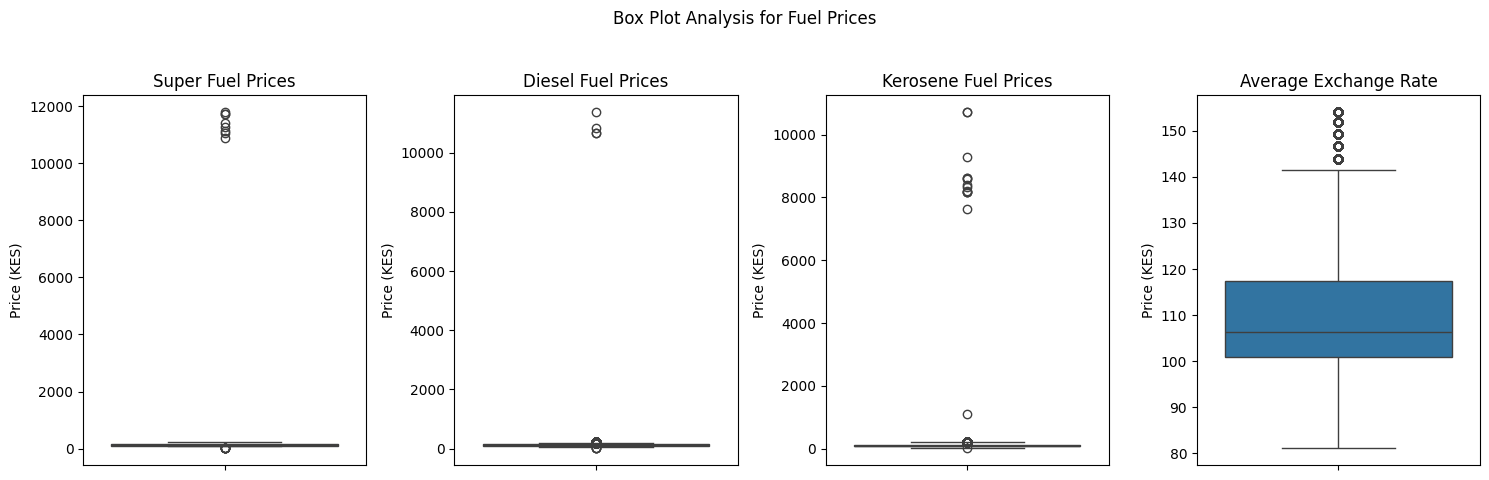

In [31]:
# Box Plot Analysis for Outliers

plt.figure(figsize=(15, 5))
plt.suptitle('Box Plot Analysis for Fuel Prices')

# Box plot for Super
plt.subplot(1, 4, 1)
sns.boxplot(y=df['Super'])
plt.title('Super Fuel Prices')
plt.ylabel('Price (KES)')

# Box plot for Diesel
plt.subplot(1, 4, 2)
sns.boxplot(y=df['Diesel'])
plt.title('Diesel Fuel Prices')
plt.ylabel('Price (KES)')

# Box plot for Kerosene
plt.subplot(1, 4, 3)
sns.boxplot(y=df['Kerosene'])
plt.title('Kerosene Fuel Prices')
plt.ylabel('Price (KES)')

# Box plot Average Exchange Rate
plt.subplot(1, 4, 4)
sns.boxplot(y=df['Average Exchange Rate'])
plt.title('Average Exchange Rate')
plt.ylabel('Price (KES)')

# Adjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


The outlier analysis using the Interquartile Range (IQR) method reveals the following counts of outliers in your data:

* 'Super': 17 outliers
* 'Diesel': 291 outliers
* 'Kerosene': 884 outliers

In [32]:
# Define the range for outliers
lower_limit = 30
upper_limit = 300

# Identify outliers in the 'Super' column
super_outliers = (df['Super'] < lower_limit) | (df['Super'] > upper_limit)

# Identify outliers in the 'Diesel' column
diesel_outliers = (df['Diesel'] < lower_limit) | (df['Diesel'] > upper_limit)

# Identify outliers in the 'Kerosene' column
kerosene_outliers = (df['Kerosene'] < lower_limit) | (df['Kerosene'] > upper_limit)

# Display potential outliers for 'Super', 'Diesel', and 'Kerosene'
print("Potential outliers in Super:")
print(df[super_outliers][['Super', 'Date', 'Town']])
print('\n')

print("Potential outliers in Diesel:")
print(df[diesel_outliers][['Diesel', 'Date', 'Town']])
print('\n')

print("Potential outliers in Kerosene:")
print(df[kerosene_outliers][['Kerosene', 'Date', 'Town']])
print('\n')

Potential outliers in Super:
          Super       Date         Town
145       11.30 2011-04-01     MACHAKOS
1161   11074.00 2012-09-01        SONDU
1167   11129.00 2012-09-01      NYAMIRA
2436   11729.00 2014-04-01        BUSIA
2451   11729.00 2014-04-01       KEROKA
2476   11790.00 2014-04-01       MIGORI
2800   11398.00 2014-09-01      KERICHO
2876   11275.00 2014-10-01       KISUMU
2977   10896.00 2014-11-01      NANYUKI
6316      19.29 2018-11-01  OLENGURUONE
7484      11.03 2019-12-01         HOLA
7500      11.14 2019-12-01       MWINGI
7601      11.78 2020-01-01      KIGANJO
7650      11.29 2020-01-01   KAPENGURIA
12718     20.18 2022-09-01     Rumuruti
12942     19.18 2022-10-01     Rumuruti
13166     18.18 2022-11-01     Rumuruti


Potential outliers in Diesel:
         Diesel       Date        Town
2110      10.87 2013-11-01        LAMU
2355   10821.00 2014-02-12       SIAYA
2463   11370.00 2014-04-01  LOKICHOGIO
2491   10650.00 2014-04-01     NYAMIRA
2793   10652.00 2014-09-

In [33]:
# Define the range for outliers
lower_limit = 30
upper_limit = 300

# Identify and remove outliers in the 'Super' column
super_outliers = (df['Super'] < lower_limit) | (df['Super'] > upper_limit)
df = df[~super_outliers]

# Identify and remove outliers in the 'Diesel' column
diesel_outliers = (df['Diesel'] < lower_limit) | (df['Diesel'] > upper_limit)
df = df[~diesel_outliers]

# Identify and remove outliers in the 'Kerosene' column
kerosene_outliers = (df['Kerosene'] < lower_limit) | (df['Kerosene'] > upper_limit)
df = df[~kerosene_outliers]

# Display potential outliers for 'Super', 'Diesel', and 'Kerosene'
print("Potential outliers in Super:")
print(df[super_outliers][['Super', 'Date', 'Town']])
print('\n')

print("Potential outliers in Diesel:")
print(df[diesel_outliers][['Diesel', 'Date', 'Town']])
print('\n')

print("Potential outliers in Kerosene:")
print(df[kerosene_outliers][['Kerosene', 'Date', 'Town']])
print('\n')

Potential outliers in Super:
Empty DataFrame
Columns: [Super, Date, Town]
Index: []


Potential outliers in Diesel:
Empty DataFrame
Columns: [Diesel, Date, Town]
Index: []


Potential outliers in Kerosene:
Empty DataFrame
Columns: [Kerosene, Date, Town]
Index: []




<ipython-input-33-ae489654886a>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[super_outliers][['Super', 'Date', 'Town']])
<ipython-input-33-ae489654886a>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[diesel_outliers][['Diesel', 'Date', 'Town']])
<ipython-input-33-ae489654886a>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[kerosene_outliers][['Kerosene', 'Date', 'Town']])


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16172 entries, 0 to 16226
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   16172 non-null  datetime64[ns]
 1   Town                   16172 non-null  object        
 2   Super                  16172 non-null  float64       
 3   Diesel                 16172 non-null  float64       
 4   Kerosene               16172 non-null  float64       
 5   Average Exchange Rate  16172 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 884.4+ KB


### Display of Towns with the Highest Fuel Prices

<ipython-input-35-3da29f768073>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Super', y='Town', data=top_10_super_df, ax=axes[0], palette='Blues_d')
<ipython-input-35-3da29f768073>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diesel', y='Town', data=top_10_diesel_df, ax=axes[1], palette='Greens_d')
<ipython-input-35-3da29f768073>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kerosene', y='Town', data=top_10_kerosene_df, ax=axes[2], palette='Reds_d')


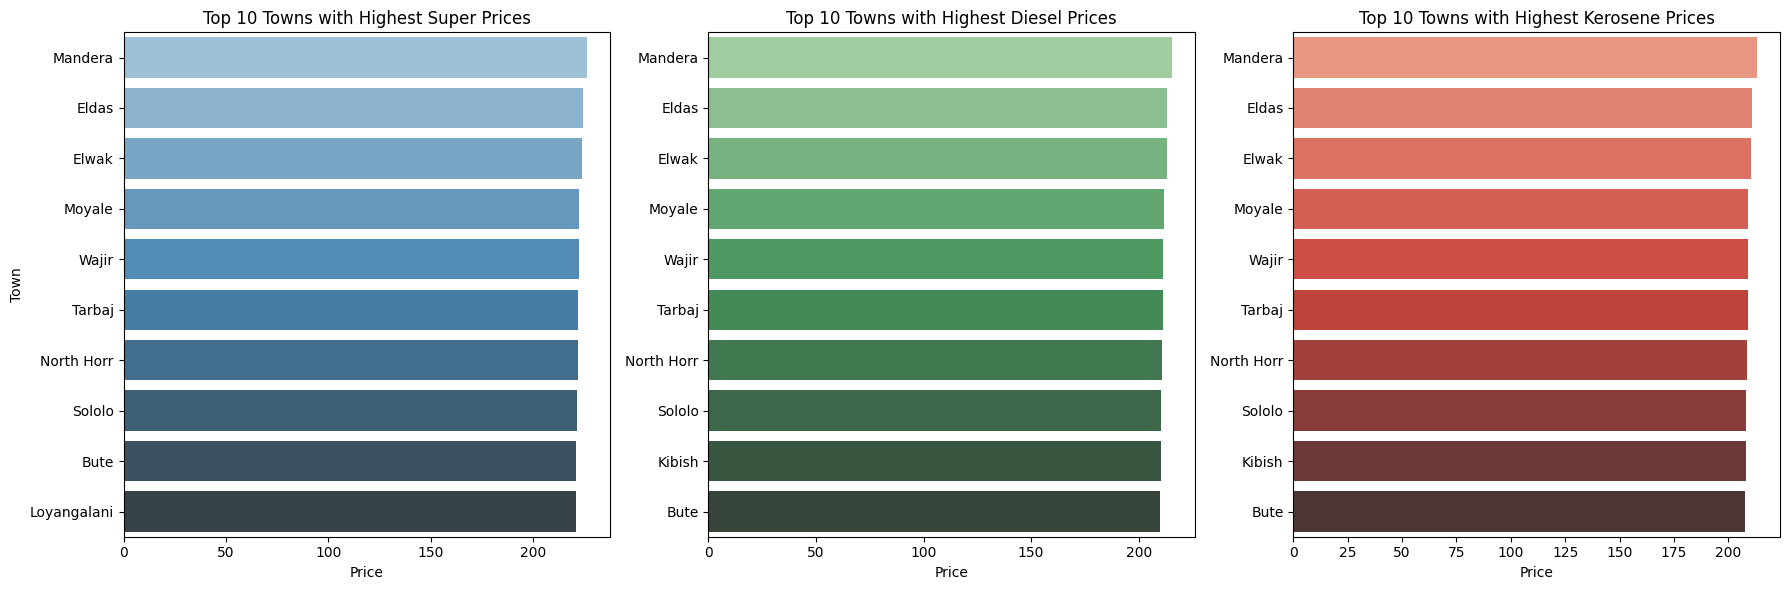

In [35]:
# Sorting the updated data by 'Date' and 'Town' to get the latest prices for each town
sorted_df = df.sort_values(by=['Town', 'Date'], ascending=[True, False])

# Dropping duplicates, keeping the first occurrence (which is the latest date due to sorting)
latest_prices_df = sorted_df.drop_duplicates(subset=['Town'])

# Finding the top 10 towns with the highest prices for Super, Diesel, and Kerosene
top_10_super_df = latest_prices_df.nlargest(10, 'Super')[['Town', 'Super']]
top_10_diesel_df = latest_prices_df.nlargest(10, 'Diesel')[['Town', 'Diesel']]
top_10_kerosene_df = latest_prices_df.nlargest(10, 'Kerosene')[['Town', 'Kerosene']]

# Create a larger figure for the three plots using seaborn
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Super Prices Plot
sns.barplot(x='Super', y='Town', data=top_10_super_df, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Towns with Highest Super Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Town')

# Diesel Prices Plot
sns.barplot(x='Diesel', y='Town', data=top_10_diesel_df, ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 10 Towns with Highest Diesel Prices')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('')

# Kerosene Prices Plot
sns.barplot(x='Kerosene', y='Town', data=top_10_kerosene_df, ax=axes[2], palette='Reds_d')
axes[2].set_title('Top 10 Towns with Highest Kerosene Prices')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


* **Super:** Mandera tops the list with the highest Super price at KES 208.68. Eldas (KES 206.54), Elwak (KES 206.19), and other towns follow, with prices above KES 203.
* **Diesel:** Mandera also has the highest Diesel price at KES 193.67. Similar towns like Eldas, Elwak, and Moyale appear in the top rankings, all with prices above KES 188.
* **Kerosene:** Mandera leads again with Kerosene at KES 183.49. Eldas, Elwak, and other towns are consistent with the previous fuel types, showing prices mostly in the KES 180 range.


The consistency of towns like Mandera in the highest price bracket across all fuels suggests a regional trend, possibly due to logistical costs or limited supply routes.

### Display of Towns with the Lowest Fuel Prices

<ipython-input-36-6dbe445579a1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_super.values, y=top10_super.index, palette="viridis")
<ipython-input-36-6dbe445579a1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_diesel.values, y=top10_diesel.index, palette="rocket")
<ipython-input-36-6dbe445579a1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_kerosene.values, y=top10_kerosene.index, palette="mako")


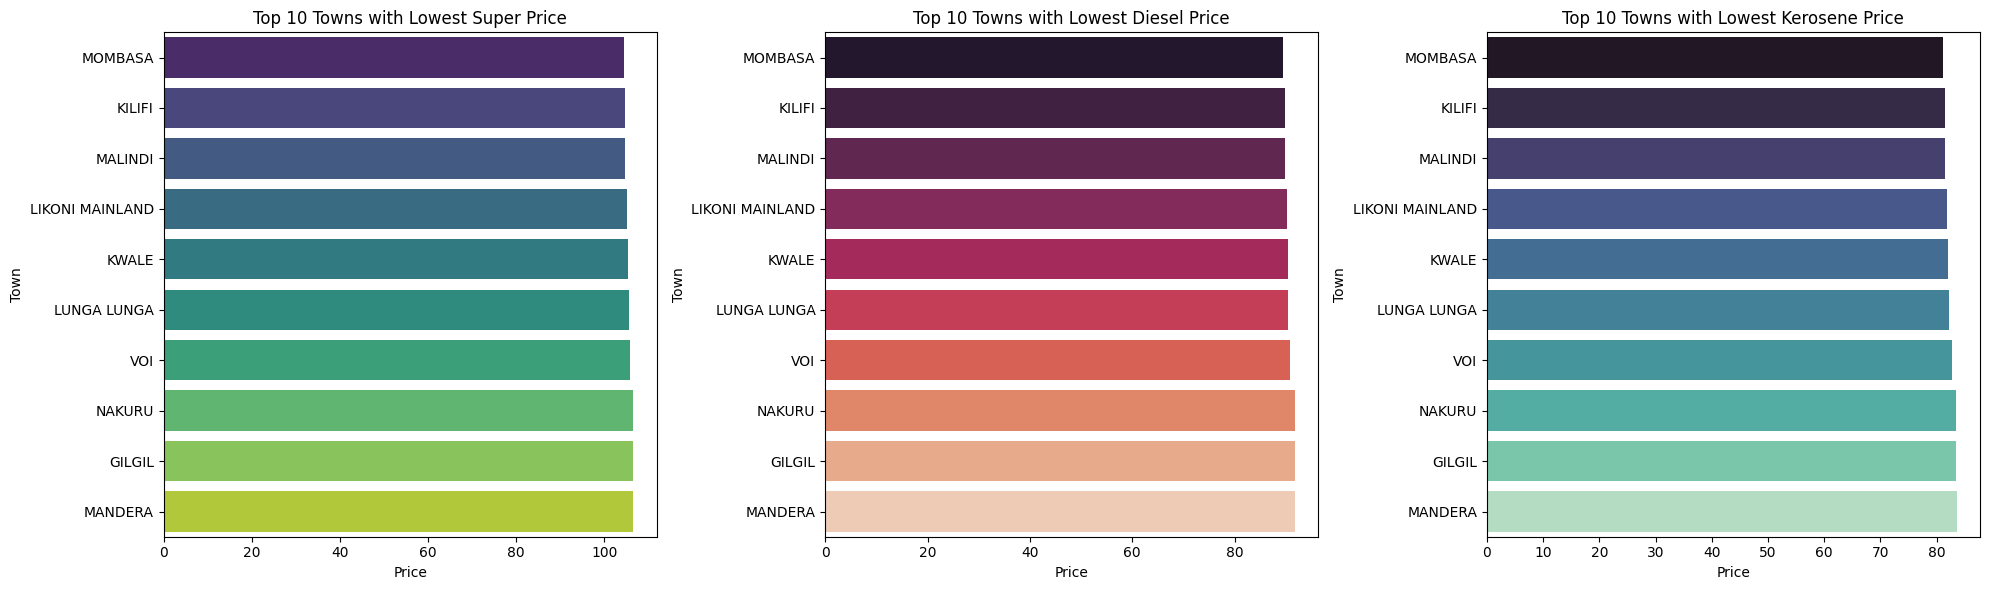

In [36]:
# Repeating the process to find the top 10 towns with the highest prices
prices = df.sort_values('Date').groupby('Town').last()

top10_super = prices['Super'].nsmallest(10)
top10_diesel = prices['Diesel'].nsmallest(10)
top10_kerosene = prices['Kerosene'].nsmallest(10)

# Creating side by side graphs for the latest prices
plt.figure(figsize=(20, 6))

# Super
plt.subplot(1, 3, 1)
sns.barplot(x=top10_super.values, y=top10_super.index, palette="viridis")
plt.title('Top 10 Towns with Lowest Super Price')
plt.xlabel('Price')
plt.ylabel('Town')

# Diesel
plt.subplot(1, 3, 2)
sns.barplot(x=top10_diesel.values, y=top10_diesel.index, palette="rocket")
plt.title('Top 10 Towns with Lowest Diesel Price')
plt.xlabel('Price')
plt.ylabel('Town')

# Kerosene
plt.subplot(1, 3, 3)
sns.barplot(x=top10_kerosene.values, y=top10_kerosene.index, palette="mako")
plt.title('Top 10 Towns with Lowest Kerosene Price')
plt.xlabel('Price')
plt.ylabel('Town')

plt.tight_layout()
plt.show()


* **Super:** Mombasa shows the lowest Super price at KES 127.46. Other towns like Likoni Mainland and Kwale have similar low prices, with the highest in this group being Kilifi at KES 128.17.
* **Diesel:** Mombasa again has the lowest Diesel price at KES 108.36, followed by towns like Likoni Mainland, Kwale, and Kilifi, all below KES 110.
* **Kerosene:** Mombasa maintains the lowest price for Kerosene at KES 101.29, with other towns like Kaloleni and Samburu having slightly higher prices, but all under KES 102.

Conversely, Mombasa consistently has the lowest prices, which could be attributed to its port city status, likely resulting in lower transportation costs and better supply chain efficiency

### Time Periods with the Highest and Lowest Fuel Prices

<ipython-input-37-04bcb20a8850>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_5_super.index, x=top_5_super.values, ax=axs[0, 0], palette="Blues_d")
<ipython-input-37-04bcb20a8850>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=lowest_5_super.index, x=lowest_5_super.values, ax=axs[0, 1], palette="Reds_d")
<ipython-input-37-04bcb20a8850>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_5_diesel.index, x=top_5_diesel.values, ax=axs[1, 0], palette="Greens_d")
<ipython-input-37-04bcb20a8850>:34: FutureWarning: 

Passing `pal

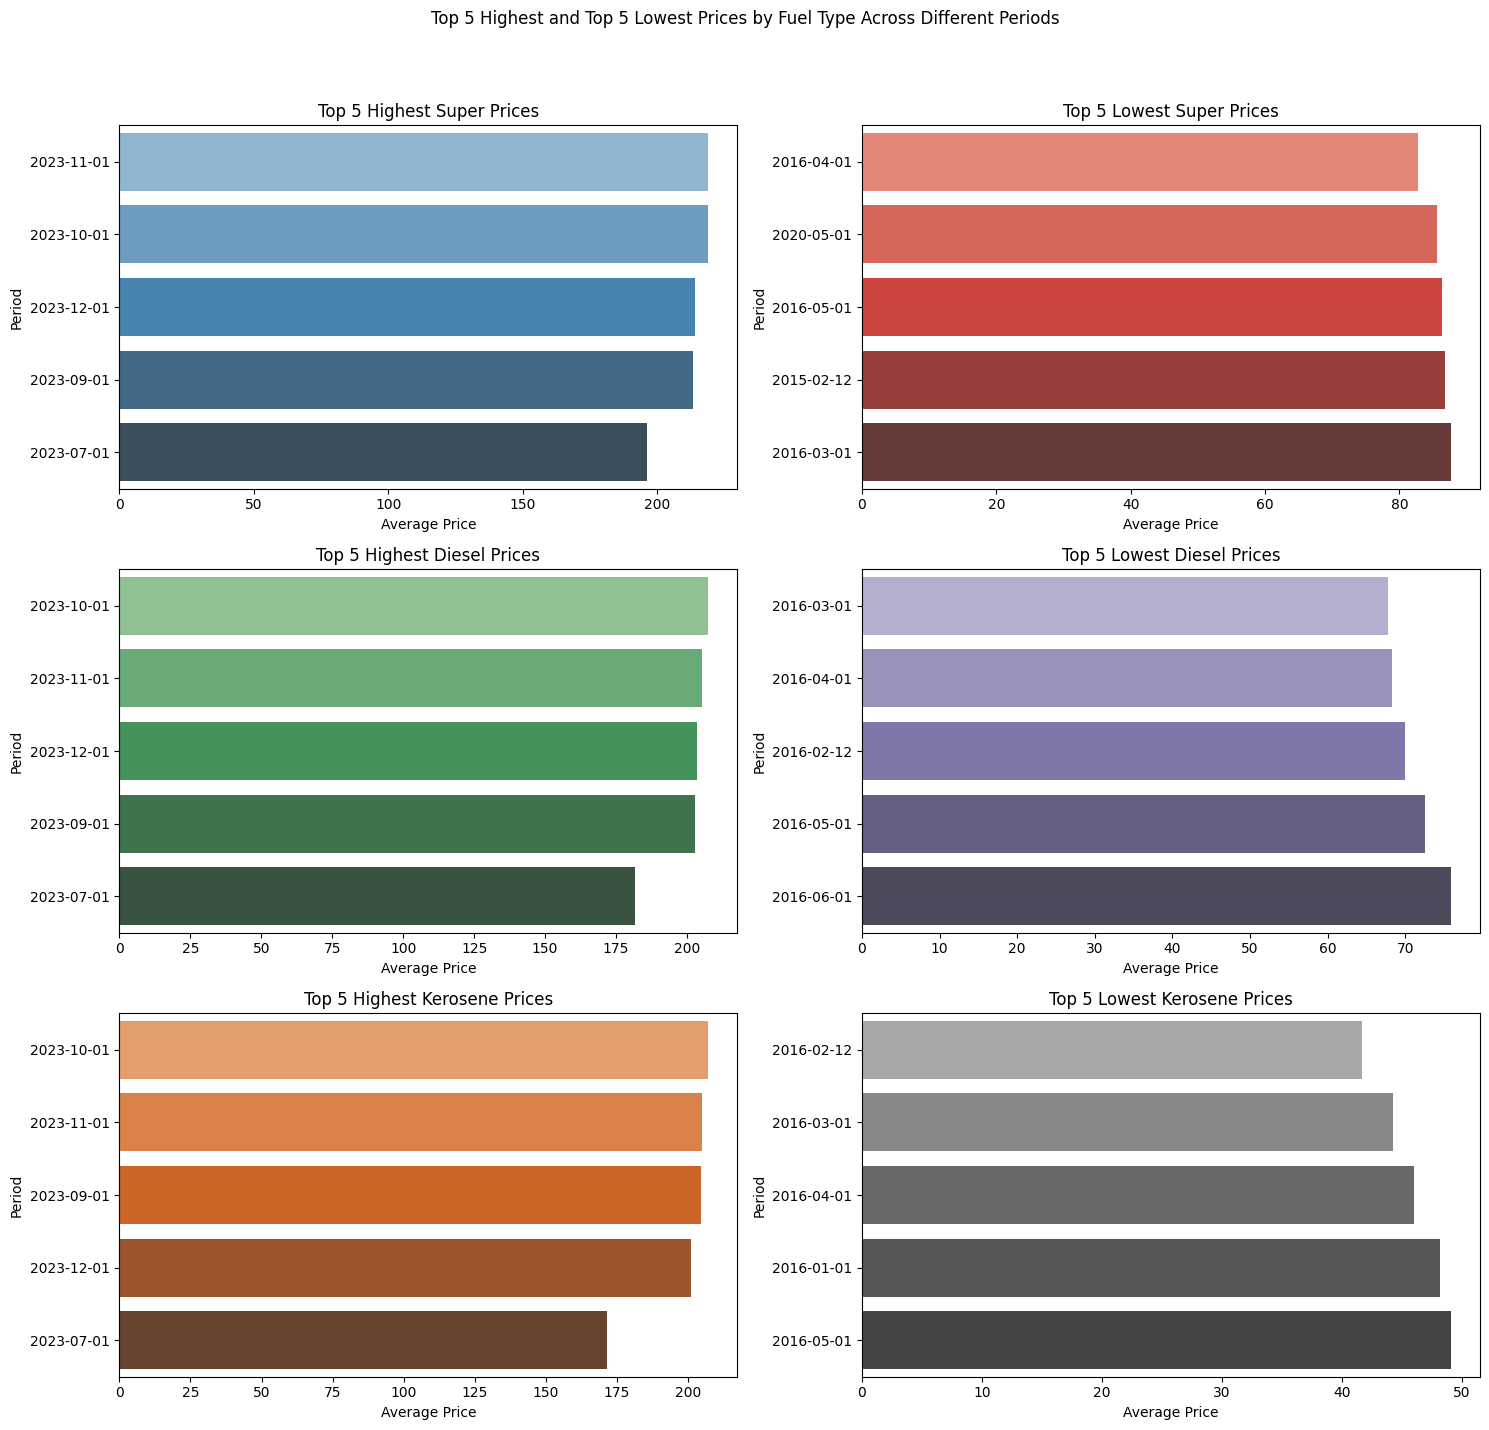

In [37]:

# Top 5 highest Super prices
top_5_super = df.groupby('Date')['Super'].mean().sort_values(ascending=False).head(5)
lowest_5_super = df.groupby('Date')['Super'].mean().sort_values().head(5)

# Top 5 highest Diesel prices
top_5_diesel = df.groupby('Date')['Diesel'].mean().sort_values(ascending=False).head(5)
lowest_5_diesel = df.groupby('Date')['Diesel'].mean().sort_values().head(5)

# Top 5 highest Kerosene prices
top_5_kerosene = df.groupby('Date')['Kerosene'].mean().sort_values(ascending=False).head(5)
lowest_5_kerosene = df.groupby('Date')['Kerosene'].mean().sort_values().head(5)

# Plotting the updated results
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Top 5 Highest and Top 5 Lowest Prices by Fuel Type Across Different Periods')

# Super Price Plots
sns.barplot(y=top_5_super.index, x=top_5_super.values, ax=axs[0, 0], palette="Blues_d")
axs[0, 0].set_title('Top 5 Highest Super Prices')
axs[0, 0].set_xlabel('Average Price')
axs[0, 0].set_ylabel('Period')

sns.barplot(y=lowest_5_super.index, x=lowest_5_super.values, ax=axs[0, 1], palette="Reds_d")
axs[0, 1].set_title('Top 5 Lowest Super Prices')
axs[0, 1].set_xlabel('Average Price')
axs[0, 1].set_ylabel('Period')

# Diesel Price Plots
sns.barplot(y=top_5_diesel.index, x=top_5_diesel.values, ax=axs[1, 0], palette="Greens_d")
axs[1, 0].set_title('Top 5 Highest Diesel Prices')
axs[1, 0].set_xlabel('Average Price')
axs[1, 0].set_ylabel('Period')

sns.barplot(y=lowest_5_diesel.index, x=lowest_5_diesel.values, ax=axs[1, 1], palette="Purples_d")
axs[1, 1].set_title('Top 5 Lowest Diesel Prices')
axs[1, 1].set_xlabel('Average Price')
axs[1, 1].set_ylabel('Period')

# Kerosene Price Plots
sns.barplot(y=top_5_kerosene.index, x=top_5_kerosene.values, ax=axs[2, 0], palette="Oranges_d")
axs[2, 0].set_title('Top 5 Highest Kerosene Prices')
axs[2, 0].set_xlabel('Average Price')
axs[2, 0].set_ylabel('Period')

sns.barplot(y=lowest_5_kerosene.index, x=lowest_5_kerosene.values, ax=axs[2, 1], palette="Greys_d")
axs[2, 1].set_title('Top 5 Lowest Kerosene Prices')
axs[2, 1].set_xlabel('Average Price')
axs[2, 1].set_ylabel('Period')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The graphs depict that the highest prices for Super, Diesel, and Kerosene occurred between July 2023 and August 2023, suggesting a peak in fuel prices during this period. Conversely, the lowest prices were recorded earlier, between November 2021 and February 2022, indicating a period of relatively lower fuel costs.

In [38]:
# Comparison of fuel prices in towns with highest fuel prices
top_5_towns_super = df.groupby('Town')[['Super', 'Diesel', 'Kerosene']].max().nlargest(5, 'Super').reset_index()
top_5_towns_super

Town   Super  Diesel  Kerosene
0  Mandera  231.36  219.47    219.06
1    Eldas  229.22  217.32    216.90
2    Elwak  228.87  216.97    216.55
3   Moyale  227.49  215.60    215.18
4    Wajir  227.31  215.41    215.00

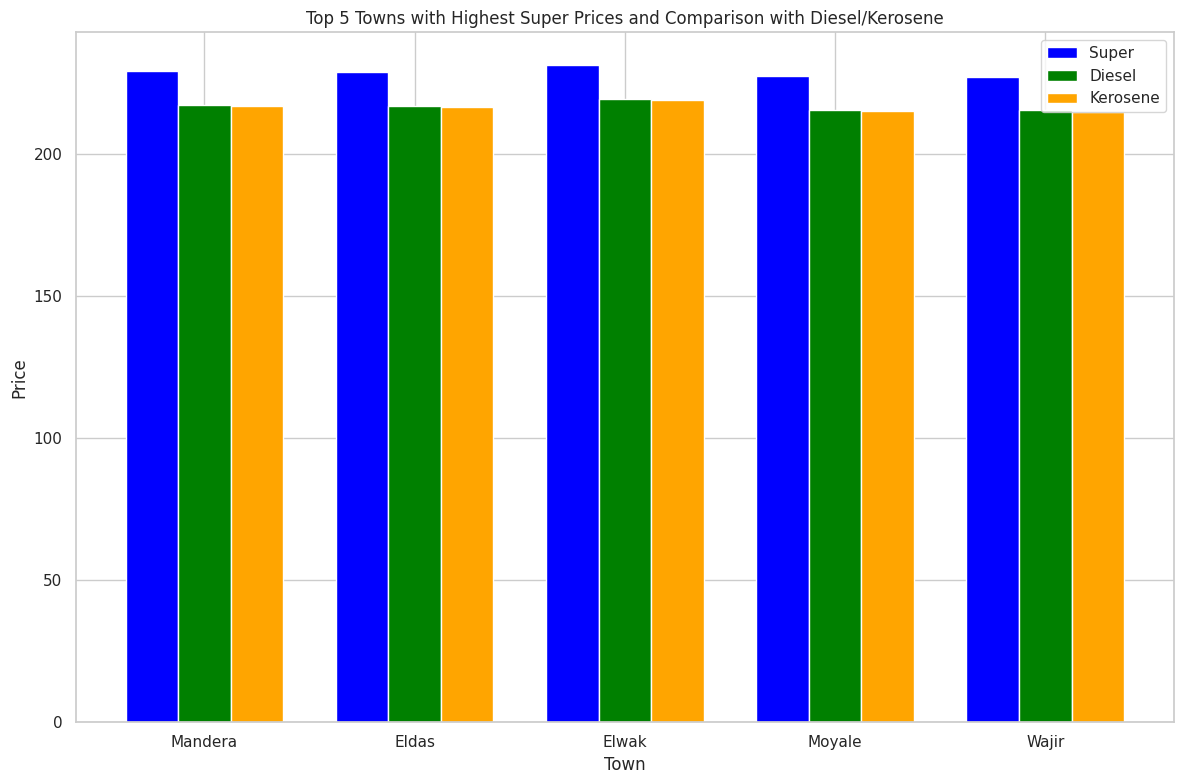

In [39]:
# Top 5 towns with comparison of the highest fuel prices
top_5_towns_super = df.groupby('Town')['Super'].max().nlargest(5).reset_index()

# Sort the towns based on the maximum Super price
sorted_towns = top_5_towns_super.sort_values(by='Super', ascending=False)['Town']

# Filter data for the top 5 towns
filtered_data = df[df['Town'].isin(sorted_towns)]

# Set the style for Seaborn
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a grouped bar plot with separate bars for Super, Diesel, and Kerosene
bar_width = 0.25
towns = filtered_data['Town'].unique()
town_indices = range(len(towns))

plt.bar([i - bar_width for i in town_indices], filtered_data.groupby('Town')['Super'].max(), width=bar_width, label='Super', color='blue')
plt.bar(town_indices, filtered_data.groupby('Town')['Diesel'].max(), width=bar_width, label='Diesel', color='green')
plt.bar([i + bar_width for i in town_indices], filtered_data.groupby('Town')['Kerosene'].max(), width=bar_width, label='Kerosene', color='orange')

# Set labels and title
plt.xlabel('Town')
plt.ylabel('Price')
plt.title('Top 5 Towns with Highest Super Prices and Comparison with Diesel/Kerosene')

# Show the legend
plt.legend()

# Adjust x-axis ticks
plt.xticks(town_indices, sorted_towns)

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()

In the comparison of fuel prices in the towns with the highest fuel prices, Mandera emerged as the top performer with a Super price of Kshs. 208.68. Diesel in Mandera was priced at Kshs. 193.67, while Kerosene was at Kshs. 183.49.

Eldas followed closely with a Super price of Kshs. 206.54, accompanied by Diesel at Kshs. 191.52 and Kerosene at Kshs. 181.33.

Elwak recorded a Super price of Kshs. 206.19, Moyale at Kshs. 204.81, with Diesel and Kerosene priced at Kshs. 189.80 and Kshs. 179.60, respectively.

Wajir featured a Super price of Kshs. 204.64, Diesel at Kshs. 189.61, and Kerosene at Kshs. 179.43.

In [40]:
# Fuel comparison of towns with lowest fuel prices
bottom_5_towns_super = df.groupby('Town')[['Super', 'Diesel', 'Kerosene']].min().nsmallest(5, 'Super').reset_index()
bottom_5_towns_super

Town  Super  Diesel  Kerosene
0          MOMBASA  77.43   62.46     36.94
1           KILIFI  77.64   62.67     37.15
2            KWALE  77.76   62.79     37.27
3  LIKONI MAINLAND  77.76   62.79     37.27
4          MALINDI  78.33   63.36     37.84

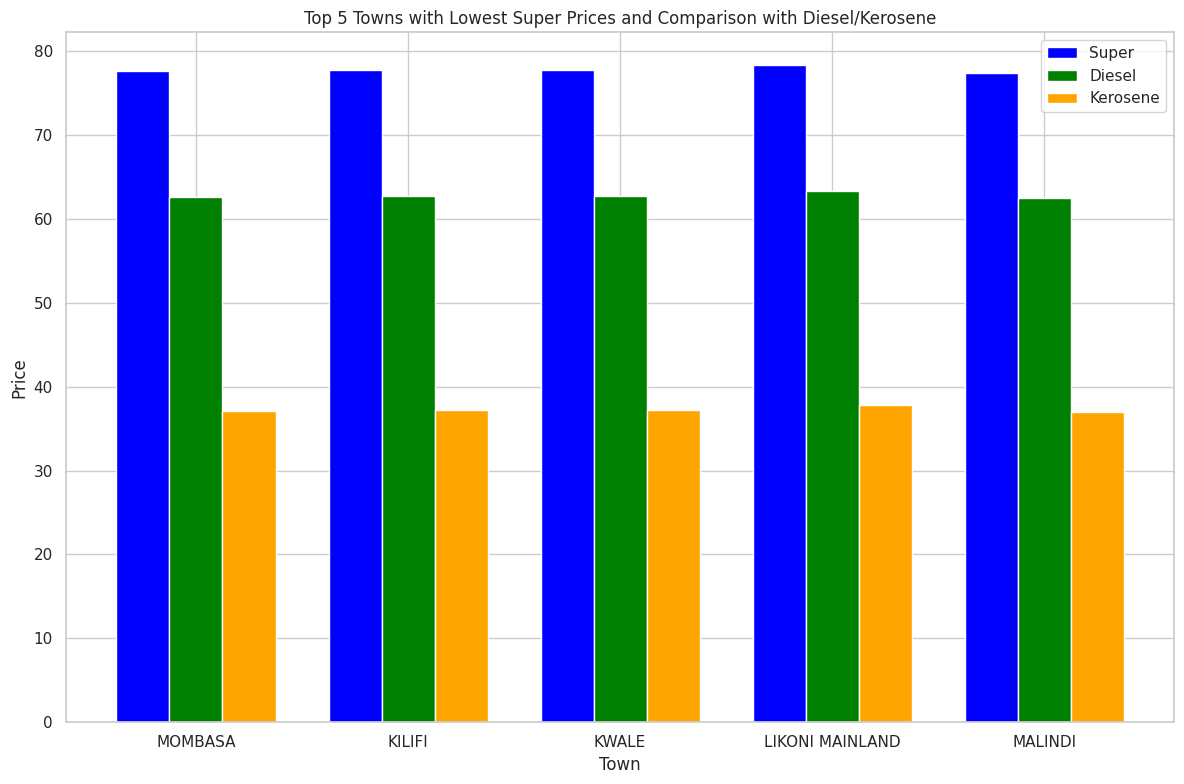

In [41]:
# Top 5 towns with the lowest Super prices with comparison of other fuel prices
bottom_5_towns_super = df.groupby('Town')['Super'].min().nsmallest(5).reset_index()

# Sort the towns based on the minimum Super price
sorted_bottom_towns = bottom_5_towns_super.sort_values(by='Super', ascending=True)['Town']

# Filter data for the bottom 5 towns
filtered_bottom_data = df[df['Town'].isin(sorted_bottom_towns)]

# Set the style for Seaborn
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a grouped bar plot with separate bars for Super, Diesel, and Kerosene
bar_width = 0.25
bottom_towns = filtered_bottom_data['Town'].unique()
bottom_town_indices = range(len(bottom_towns))

plt.bar([i - bar_width for i in bottom_town_indices], filtered_bottom_data.groupby('Town')['Super'].min(), width=bar_width, label='Super', color='blue')
plt.bar(bottom_town_indices, filtered_bottom_data.groupby('Town')['Diesel'].min(), width=bar_width, label='Diesel', color='green')
plt.bar([i + bar_width for i in bottom_town_indices], filtered_bottom_data.groupby('Town')['Kerosene'].min(), width=bar_width, label='Kerosene', color='orange')

# Set labels and title
plt.xlabel('Town')
plt.ylabel('Price')
plt.title('Top 5 Towns with Lowest Super Prices and Comparison with Diesel/Kerosene')

# Show the legend
plt.legend()

# Adjust x-axis ticks
plt.xticks(bottom_town_indices, sorted_bottom_towns)

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()

In the comparison of fuel prices in the towns with the lowest fuel prices, Mombasa stood out as the most economical choice. In Mombasa, Super was priced at Kshs. 127.46, Diesel at Kshs. 108.36, and Kerosene at Kshs. 101.29.

Following Mombasa were Kwale and Likoni Mainland, where Super was priced at 127.82, Diesel at 108.71, and Kerosene at 101.65.

Kilifi exhibited Super at 128.17, Diesel at 109.07, and Kerosene at 102.01.

Malindi showcased Super at 128.39, Diesel at 109.27, and Kerosene at 102.21.

###  Trends in Fuel Prices and Exchange Rates
The comprehensive monthly overview aims to unveil the trends and patterns in the average monthly prices of Super, Diesel, and Kerosene fuels, alongside the average monthly exchange rate. This analysis provides a foundational understanding of how fuel prices fluctuate over time and how they might correlate with changes in the exchange rate, offering valuable insights for economic forecasting and decision-making

<ipython-input-42-35ecc29e3d3f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_avg_prices = df.groupby('Year').mean()


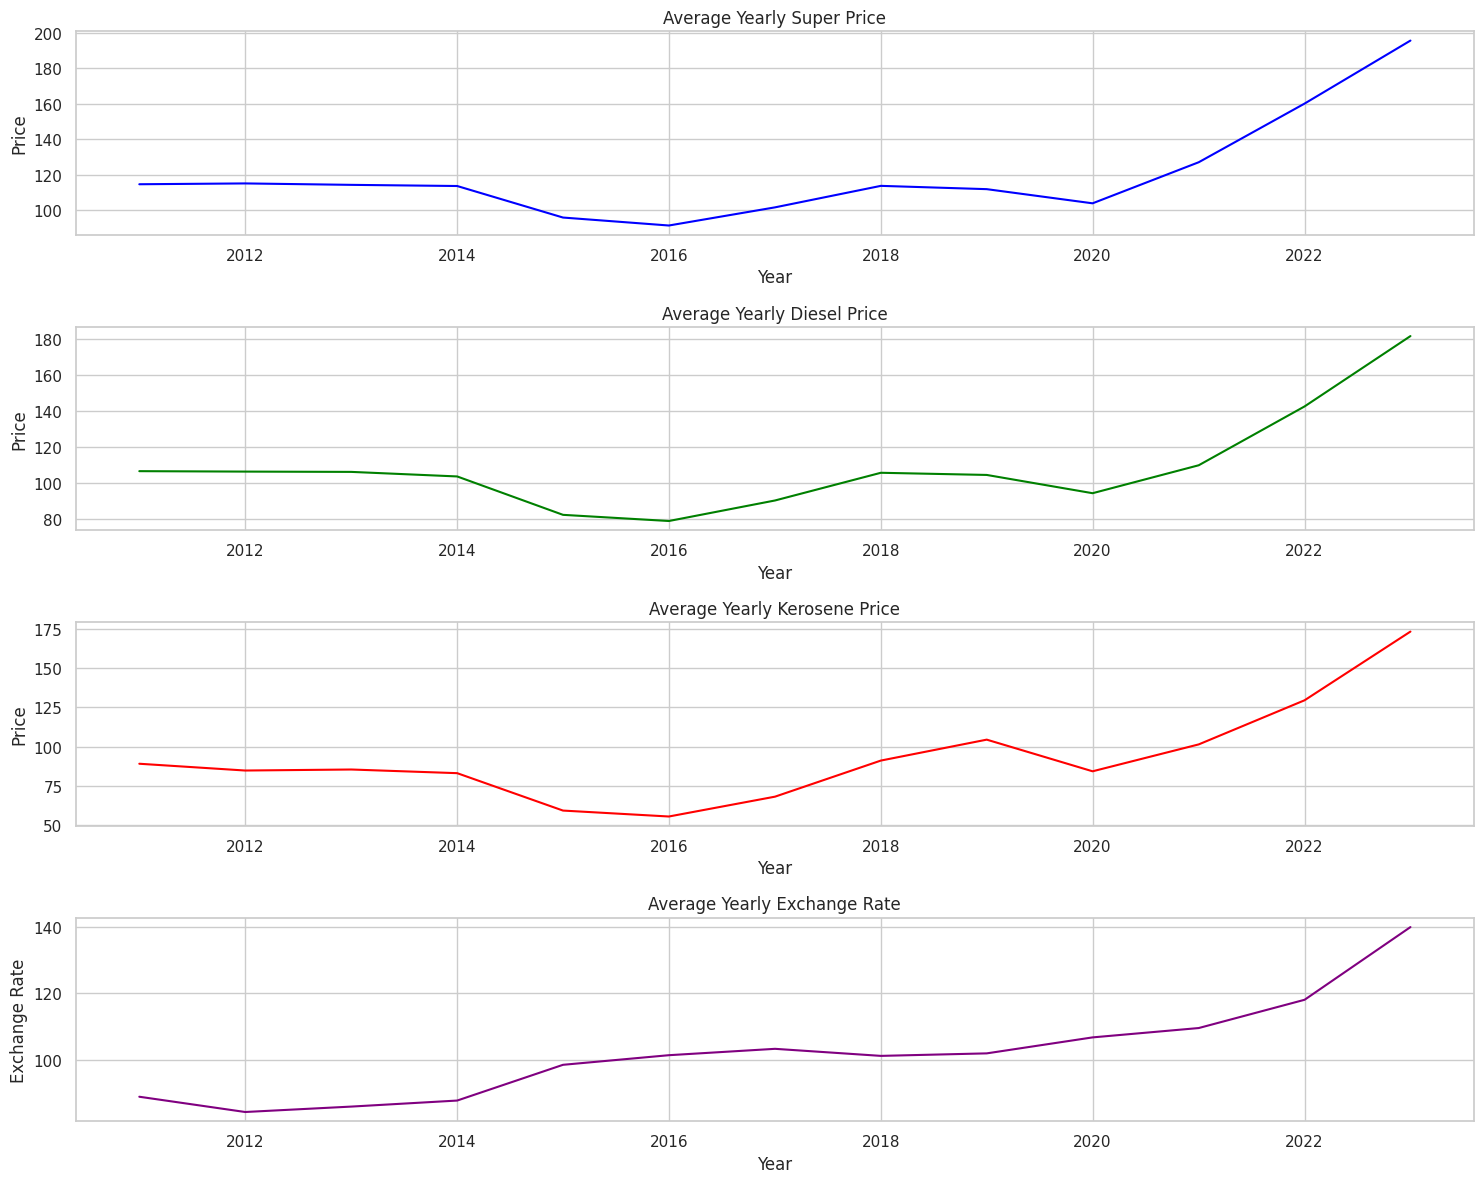

In [42]:
# Adding a 'Month-Year' column for grouping
df['Year'] = df['Date'].dt.to_period('Y')


# Calculating average prices per year for each fuel type
yearly_avg_prices = df.groupby('Year').mean()

# Resetting the index to convert 'Year' back to a column
yearly_avg_prices.reset_index(inplace=True)

# Converting 'Year' from Period to datetime for plotting
yearly_avg_prices['Year'] = yearly_avg_prices['Year'].dt.to_timestamp()

plt.figure(figsize=(15, 12))

# Plot for Average Yearly Super Price
plt.subplot(4, 1, 1)
plt.plot(yearly_avg_prices['Year'], yearly_avg_prices['Super'], label='Average Super', color='blue')
plt.title('Average Yearly Super Price')
plt.xlabel('Year')
plt.ylabel('Price')

# Plot for Average Yearly Diesel Price
plt.subplot(4, 1, 2)
plt.plot(yearly_avg_prices['Year'], yearly_avg_prices['Diesel'], label='Average Diesel', color='green')
plt.title('Average Yearly Diesel Price')
plt.xlabel('Year')
plt.ylabel('Price')

# Plot for Average Yearly Kerosene Price
plt.subplot(4, 1, 3)
plt.plot(yearly_avg_prices['Year'], yearly_avg_prices['Kerosene'], label='Average Kerosene', color='red')
plt.title('Average Yearly Kerosene Price')
plt.xlabel('Year')
plt.ylabel('Price')

# Plot for Average Yearly Exchange Rate
plt.subplot(4, 1, 4)
plt.plot(yearly_avg_prices['Year'], yearly_avg_prices['Average Exchange Rate'], label='Average Exchange Rate', color='purple')
plt.title('Average Yearly Exchange Rate')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')

plt.tight_layout()
plt.show()


The line graphs from 2012 to 2020 reveal an overall rise in Super and Diesel fuel prices, with Kerosene prices remaining stable with slight increases post-2016. Concurrently, the average exchange rate graph suggests currency depreciation or inflation. The dips in 2015-2016 and 2020 correspond to global oil price drops: the former due to a supply glut from increased U.S. shale production and shifting *OPEC* (Organization of the Petroleum Exporting Countries) policies, and the latter from demand destruction caused by COVID-19. These events affected fuel prices and exchange rates, particularly in oil-importing countries, highlighting the interconnectedness of global oil dynamics, economic activities, and geopolitical tensions.

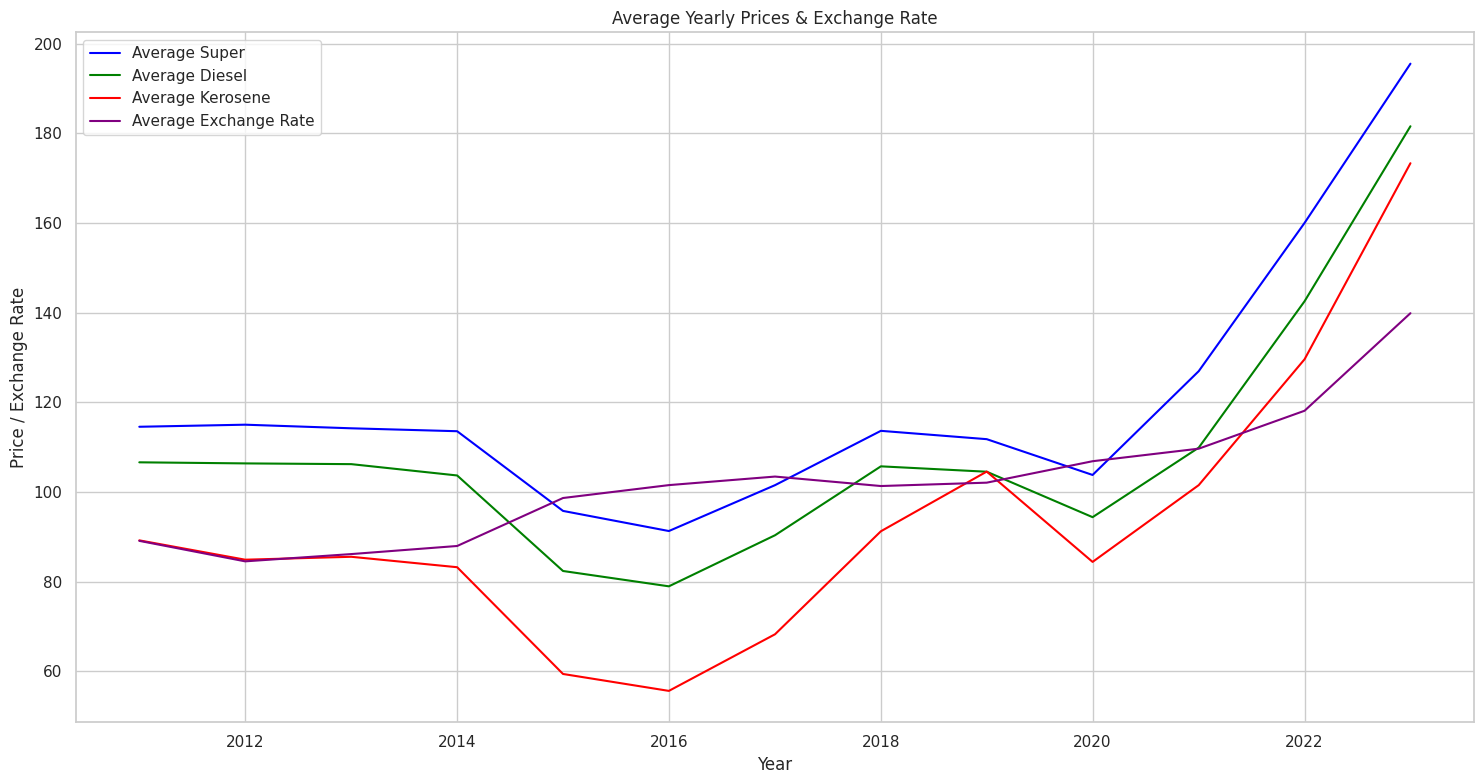

In [43]:
# Combining all four plots into a single plot for a comprehensive view
plt.figure(figsize=(15, 8))

# Plot for Average Yearly Super Price
plt.plot(yearly_avg_prices['Year'], yearly_avg_prices['Super'], label='Average Super', color='blue')

# Plot for Average Yearly Diesel Price
plt.plot(yearly_avg_prices['Year'], yearly_avg_prices['Diesel'], label='Average Diesel', color='green')

# Plot for Average Yearly Kerosene Price
plt.plot(yearly_avg_prices['Year'], yearly_avg_prices['Kerosene'], label='Average Kerosene', color='red')

# Plot for Average Yearly Exchange Rate
plt.plot(yearly_avg_prices['Year'], yearly_avg_prices['Average Exchange Rate'], label='Average Exchange Rate', color='purple')

# Adding titles and labels
plt.title('Average Yearly Prices & Exchange Rate')
plt.xlabel('Year')
plt.ylabel('Price / Exchange Rate')
plt.legend()

# Display the combined plot
plt.tight_layout()
plt.show()


### Seasonality

<ipython-input-44-2542686e8f70>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg_prices = df.groupby('Year-Month').mean()


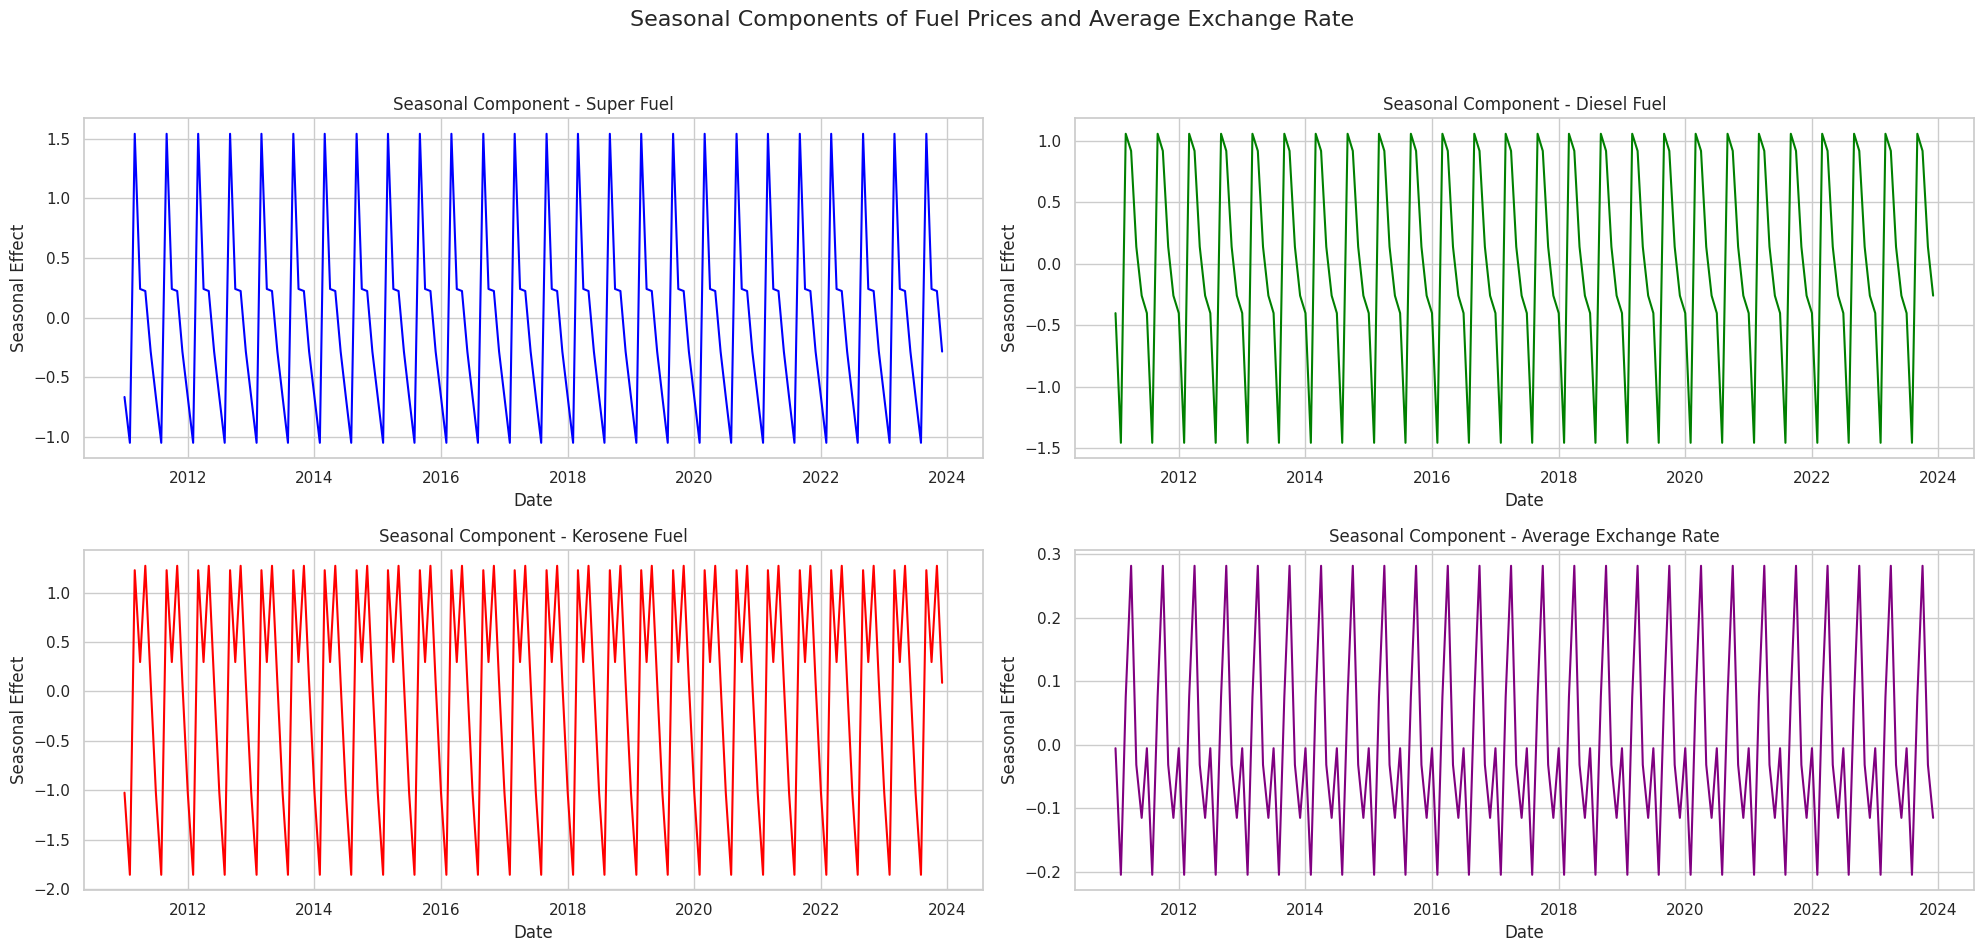

In [44]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Adding a 'Year-Month' column for grouping
df['Year-Month'] = df['Date'].dt.to_period('M')

# Calculating average prices per month for each fuel type and exchange rate
monthly_avg_prices = df.groupby('Year-Month').mean()

# Resetting the index to convert 'Year-Month' back to a column
monthly_avg_prices.reset_index(inplace=True)

# Ensuring 'Year-Month' is in datetime format for plotting
monthly_avg_prices['Year-Month'] = monthly_avg_prices['Year-Month'].dt.to_timestamp()

# Performing decompositions with a reduced period of 6 months
decomp_super = seasonal_decompose(monthly_avg_prices.set_index('Year-Month')['Super'], model='additive', period=6)
decomp_diesel = seasonal_decompose(monthly_avg_prices.set_index('Year-Month')['Diesel'], model='additive', period=6)
decomp_kerosene = seasonal_decompose(monthly_avg_prices.set_index('Year-Month')['Kerosene'], model='additive', period=6)
decomp_exchange_rate = seasonal_decompose(monthly_avg_prices.set_index('Year-Month')['Average Exchange Rate'], model='additive', period=6)

# Plotting the seasonal components
plt.figure(figsize=(20, 10))
plt.suptitle('Seasonal Components of Fuel Prices and Average Exchange Rate', fontsize=16)

# Plot for Super Fuel
plt.subplot(2, 2, 1)
plt.plot(decomp_super.seasonal.index, decomp_super.seasonal, color='blue')
plt.title('Seasonal Component - Super Fuel')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')

# Plot for Diesel Fuel
plt.subplot(2, 2, 2)
plt.plot(decomp_diesel.seasonal.index, decomp_diesel.seasonal, color='green')
plt.title('Seasonal Component - Diesel Fuel')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')

# Plot for Kerosene Fuel
plt.subplot(2, 2, 3)
plt.plot(decomp_kerosene.seasonal.index, decomp_kerosene.seasonal, color='red')
plt.title('Seasonal Component - Kerosene Fuel')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')

# Plot for Average Exchange Rate
plt.subplot(2, 2, 4)
plt.plot(decomp_exchange_rate.seasonal.index, decomp_exchange_rate.seasonal, color='purple')
plt.title('Seasonal Component - Average Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')

# Adjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


### Correlation
The correlation section examines the statistical relationships between the different types of fuel prices and the Dolllar Average Exchange Rate in Kenya.

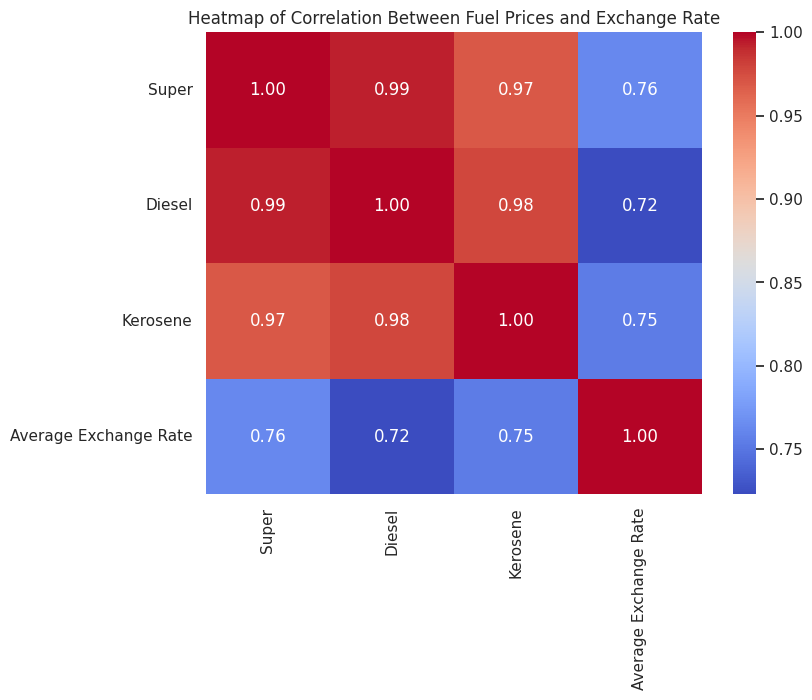

In [45]:
# Calculating the correlation matrix to see the relationship between the exchange rate and fuel prices
correlation_matrix = yearly_avg_prices[['Super', 'Diesel', 'Kerosene', 'Average Exchange Rate']].corr()

# Plotting the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Between Fuel Prices and Exchange Rate')
plt.show()


In [46]:
yearly_avg_prices.head(20)

Year       Super      Diesel    Kerosene  Average Exchange Rate
0  2011-01-01  114.522875  106.592281   89.183362              89.071113
1  2012-01-01  114.986272  106.350704   84.867852              84.499724
2  2013-01-01  114.180872  106.185293   85.516918              86.122456
3  2014-01-01  113.529746  103.657736   83.190064              87.926777
4  2015-01-01   95.750338   82.347452   59.374215              98.629801
5  2016-01-01   91.263127   78.927634   55.599822             101.505854
6  2017-01-01  101.495680   90.320453   68.231360             103.413325
7  2018-01-01  113.615533  105.695545   91.208366             101.301928
8  2019-01-01  111.756549  104.493639  104.526888             102.052710
9  2020-01-01  103.771361   94.355029   84.376024             106.836568
10 2021-01-01  126.930520  109.865708  101.501960             109.635926
11 2022-01-01  160.005986  142.528255  129.588911             118.096975
12 2023-01-01  195.521197  181.564441  173.317217             139.861018

# Modelling

### Facebook Prophet

In [47]:
# !pip install fbprophet

In [48]:
df.head()

Date             Town  Super  Diesel  Kerosene  Average Exchange Rate  \
0 2011-01-01          MOMBASA  92.53   85.59     74.41              81.029071   
1 2011-01-01  LIKONI MAINLAND  92.86   85.92     74.74              81.029071   
2 2011-01-01           KILIFI  92.71   85.77     74.60              81.029071   
3 2011-01-01          MALINDI  93.29   86.35     75.18              81.029071   
4 2011-01-01            KWALE  92.87   85.93     74.75              81.029071   

   Year Year-Month  
0  2011    2011-01  
1  2011    2011-01  
2  2011    2011-01  
3  2011    2011-01  
4  2011    2011-01

Aggregating the data and preparing it for a Prophet model for `Super`. We will average the prices across all towns for each date range and use the midpoint of each date range as the date stamp.Facebook's Prophet requires the data to be in a specific format with columns `ds` (date stamp) and `y` (the value to be predicted).
In this case:
* `ds`: The midpoint date of each date range.
* `y`: The average price of 'Super' fuel across all towns for each date range.


In [47]:
# Apply the function to calculate the midpoint
#f['Midpoint Date'] = df.apply(lambda row: calculate_midpoint(row['Start Date'], row['End Date']), axis=1)

# Aggregate the data by the midpoint date for each fuel type
##super_data = df.groupby('Midpoint Date')['Super'].mean().reset_index()
##diesel_data = df.groupby('Midpoint Date')['Diesel'].mean().reset_index()
##kerosene_data = df.groupby('Midpoint Date')['Kerosene'].mean().reset_index()

# Renaming columns for Prophet compatibility
#super_data.rename(columns={'Midpoint Date': 'ds', 'Super': 'y'}, inplace=True)
#diesel_data.rename(columns={'Midpoint Date': 'ds', 'Diesel': 'y'}, inplace=True)
#kerosene_data.rename(columns={'Midpoint Date': 'ds', 'Kerosene': 'y'}, inplace=True)

# Display the first few rows of the prepared data
#super_data.head(), diesel_data.head(), kerosene_data.head()


**Data Preprocessing**

**Super**

In [49]:
monthly_avg_prices.head(10)

Year-Month       Super      Diesel   Kerosene  Average Exchange Rate
0 2011-01-01   97.568213   90.614135  79.405278              81.029071
1 2011-02-01   99.968884   93.022530  81.378934              81.473400
2 2011-03-01  103.943537   96.171242  85.477435              84.205509
3 2011-04-01  112.748080  108.725395  92.569070              83.889816
4 2011-05-01  114.074839  107.982194  91.569692              85.433010
5 2011-06-01  116.949280  108.324917  87.675140              89.049281
6 2011-07-01  117.570978  108.239257  88.203586              89.897733
7 2011-08-01  119.206923  110.974973  90.916691              92.785959
8 2011-09-01  119.547297  110.176910  90.249948              96.357264
9 2011-10-01  121.769897  112.326310  91.570748             101.269790

In [50]:
# Put the data in a final csv document
final_final_data = monthly_avg_prices[['Year-Month','Super', 'Diesel', 'Kerosene', 'Average Exchange Rate']]
final_final_data.to_csv('final_final_data.csv', index=False)

In [51]:
df2= pd.read_csv('/content/final_final_data.csv')
df2

Year-Month       Super      Diesel    Kerosene  Average Exchange Rate
0    2011-01-01   97.568213   90.614135   79.405278              81.029071
1    2011-02-01   99.968884   93.022530   81.378934              81.473400
2    2011-03-01  103.943537   96.171242   85.477435              84.205509
3    2011-04-01  112.748080  108.725395   92.569070              83.889816
4    2011-05-01  114.074839  107.982194   91.569692              85.433010
..          ...         ...         ...         ...                    ...
151  2023-08-01  196.394350  181.638027  171.476368             143.931135
152  2023-09-01  213.295336  202.922960  204.532466             146.768948
153  2023-10-01  219.014798  207.403049  206.981794             149.397865
154  2023-11-01  219.014798  205.403049  204.981794             152.032486
155  2023-12-01  214.014798  203.403049  200.980404             154.090606

[156 rows x 5 columns]

# Super

In [52]:
columns_to_drop = ['Diesel', 'Kerosene', 'Average Exchange Rate']
super=monthly_avg_prices.drop(columns_to_drop, axis=1)
super.head()

Year-Month       Super
0 2011-01-01   97.568213
1 2011-02-01   99.968884
2 2011-03-01  103.943537
3 2011-04-01  112.748080
4 2011-05-01  114.074839

**`Make Year-Month the index`**

In [53]:
# Set the month-year column as the index
super.set_index('Year-Month', inplace=True)

In [54]:
super.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Year-Month', length=156, freq=None)

In [55]:
super.head(10)

Super
Year-Month            
2011-01-01   97.568213
2011-02-01   99.968884
2011-03-01  103.943537
2011-04-01  112.748080
2011-05-01  114.074839
2011-06-01  116.949280
2011-07-01  117.570978
2011-08-01  119.206923
2011-09-01  119.547297
2011-10-01  121.769897

**Visualize super price data**

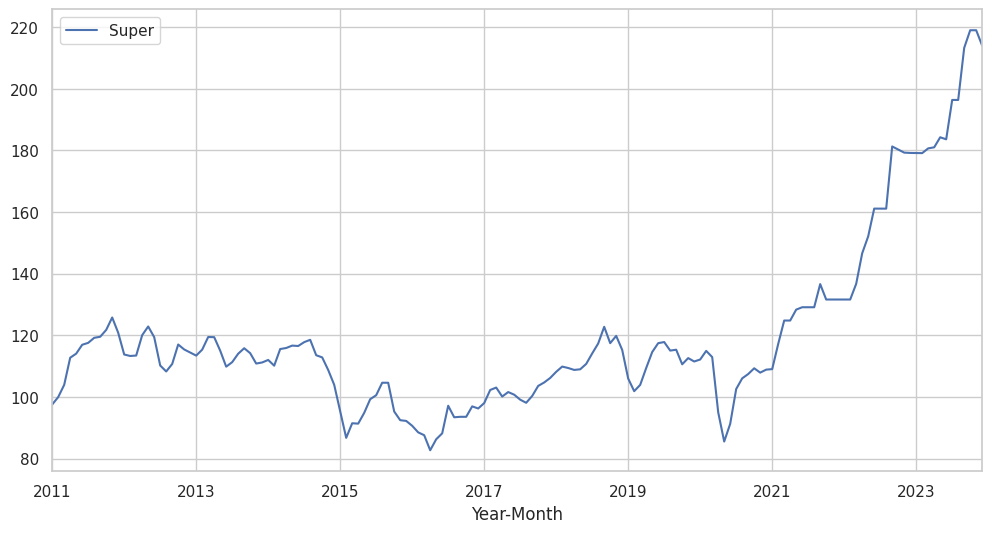

In [56]:
# Visualize the super prices time series data
super.plot(figsize=(12, 6))

plt.show()

Between 2011 and 2012, super prices exhibited a consistent upward trend, rising from 100 to 120. This was followed by a gradual fluctuation in prices until 2015 when a noticeable dip occurred. From 2016 to 2017, there was a recovery in fuel prices. Notably, after 2017, there was a sustained increase, reaching 120 in 2019. However, a dip occurred in 2020, only to be followed by a substantial rise in fuel prices starting in 2021 and continuing through 2023.

**Testing for trends/stationarity**

In [57]:
#DickeyFuller Test on super

# Perform Dickey-Fuller test
result = adfuller(super)

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# Compare p-value to a significance level to make a decision about stationarity
if p_value <= 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely non-stationary.')

Test Statistic: 1.652403044062274
P-value: 0.9980065761087243
The time series is likely non-stationary.


The time series is not stationary as the P-value is higher than the significance level of 0.05. We will do differencing to try and make the time series stationary.

In [58]:
# Differencing the time series
diff = super.diff().dropna()

# Perform ADF test on the differenced series
result_diff = adfuller(diff)

# Extract and print the test statistic and p-value
test_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]

print(f'Test Statistic (After Differencing): {test_statistic_diff}')
print(f'P-value (After Differencing): {p_value_diff}')

# Compare p-value to a significance level to make a decision about stationarity
if p_value_diff <= 0.05:
    print('The differenced time series is likely stationary.')
else:
    print('The differenced time series is likely non-stationary.')

Test Statistic (After Differencing): -9.478923550792828
P-value (After Differencing): 3.9205182217801414e-16
The differenced time series is likely stationary.


The time series is now stationary.

**Plotting PACF & ACF**

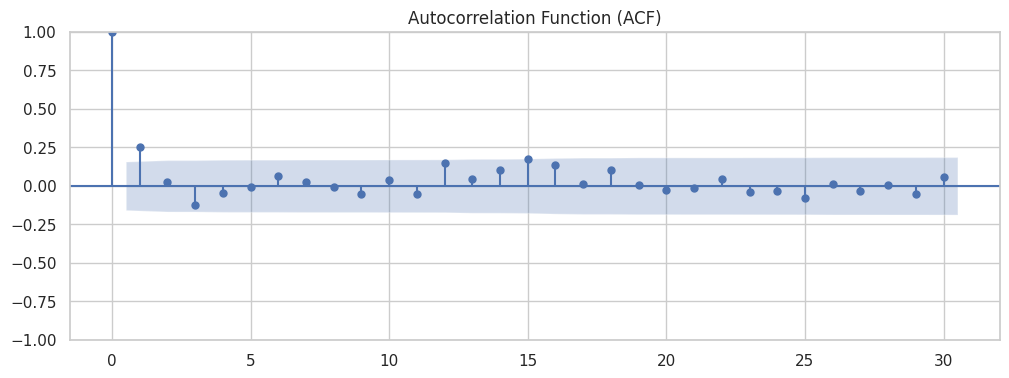

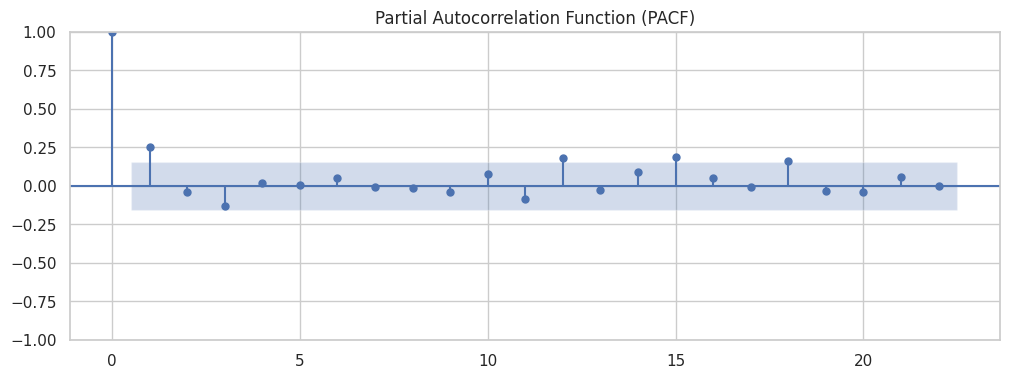

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(diff, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(diff, lags=22, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [60]:
diff.head()

Super
Year-Month          
2011-02-01  2.400671
2011-03-01  3.974652
2011-04-01  8.804543
2011-05-01  1.326759
2011-06-01  2.874441

In [61]:
super_df=diff
super_df.head()

Super
Year-Month          
2011-02-01  2.400671
2011-03-01  3.974652
2011-04-01  8.804543
2011-05-01  1.326759
2011-06-01  2.874441

In [62]:
super_df.isnull().sum()

Super    0
dtype: int64

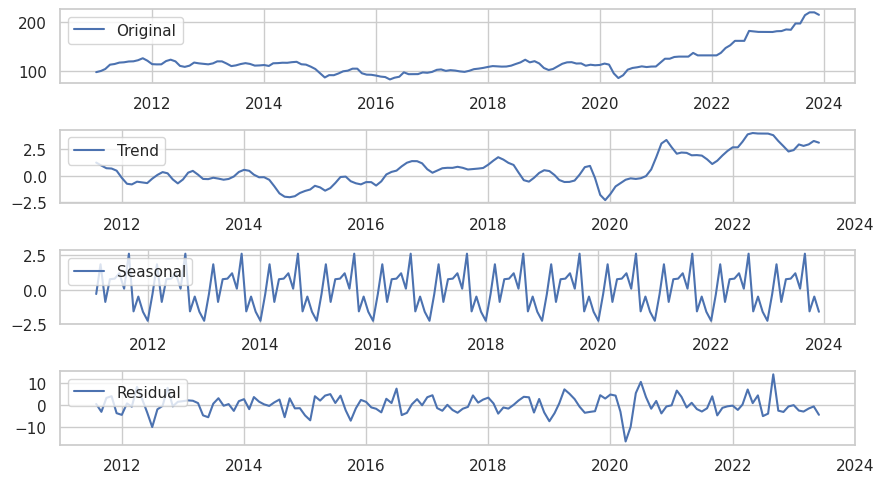

In [63]:
# Decomposition for Super Prices with a 12-month period
tsd_result = seasonal_decompose(super_df['Super'], model='additive', period=12)

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(9, 5))
plt.subplot(4, 1, 1)
plt.plot(super, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(tsd_result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(tsd_result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(tsd_result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In the seasonal component there is are periodic patterns therefore suggesting the presence of seasonality in the time series.

**Upsampling from monthly to daily**

In [64]:
# Ensure the index is a DatetimeIndex
super_df.index = pd.to_datetime(super_df.index)

# Upsampling the dataset from monthly to daily frequency
super_df_daily = super_df.resample('D').interpolate(method='linear')

In [65]:
super_df_daily.head(10)

Super
Year-Month          
2011-02-01  2.400671
2011-02-02  2.456885
2011-02-03  2.513099
2011-02-04  2.569312
2011-02-05  2.625526
2011-02-06  2.681739
2011-02-07  2.737953
2011-02-08  2.794167
2011-02-09  2.850380
2011-02-10  2.906594

In [66]:
super_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4687 entries, 2011-02-01 to 2023-12-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Super   4687 non-null   float64
dtypes: float64(1)
memory usage: 73.2 KB


In [67]:
from sklearn.model_selection import train_test_split

# Splitting the upsampled data into train and test sets
train_super_daily, test_super_daily = train_test_split(super_df_daily, test_size=0.2, shuffle=False)

# Displaying the first few rows of the upsampled dataset and the splits
super_df_daily.head(), train_super_daily.head(), test_super_daily.head()

(               Super
 Year-Month          
 2011-02-01  2.400671
 2011-02-02  2.456885
 2011-02-03  2.513099
 2011-02-04  2.569312
 2011-02-05  2.625526,
                Super
 Year-Month          
 2011-02-01  2.400671
 2011-02-02  2.456885
 2011-02-03  2.513099
 2011-02-04  2.569312
 2011-02-05  2.625526,
                Super
 Year-Month          
 2021-05-08  2.917561
 2021-05-09  2.828033
 2021-05-10  2.738504
 2021-05-11  2.648976
 2021-05-12  2.559447)

# MODELLING

We're going to model using;

1.ARIMA - Base Model

2.SARIMA

3.Facebook Prophet

4.LSTM

# ARIMA

**Best ARIMA Order**

In [68]:
#Best ARIMA order

from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define a range of p, d, and q values to try
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

best_aic = np.inf
best_order = None

# Trying different combinations of p, d, and q
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(super_df_daily['Super'], order=(p, d, q))
                model_fit = model.fit()
                print(f'ARIMA({p},{d},{q}) - AIC:{model_fit.aic}')

                # Check if this model has the lowest AIC
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, d, q)
            except:
                continue

print('Best ARIMA order:', best_order)

ARIMA(0,0,0) - AIC:26384.54844256462


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0,0,1) - AIC:19936.46684821404


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0,0,2) - AIC:13880.17817146689


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0,0,3) - AIC:8756.093785044937
ARIMA(0,1,0) - AIC:-2393.7960747629018
ARIMA(0,1,1) - AIC:-7066.728503577448
ARIMA(0,1,2) - AIC:-9620.587637787772
ARIMA(0,1,3) - AIC:-11033.572760365263
ARIMA(1,0,0) - AIC:-2386.506227027055
ARIMA(1,0,1) - AIC:-7059.933459552677
ARIMA(1,0,2) - AIC:-9614.679693638303
ARIMA(1,0,3) - AIC:-11028.806199594226
ARIMA(1,1,0) - AIC:-13864.733924621138
ARIMA(1,1,1) - AIC:-13865.014096965506
ARIMA(1,1,2) - AIC:-13865.282219583343
ARIMA(1,1,3) - AIC:-13865.520643632073
ARIMA(2,0,0) - AIC:-13967.065242824632
ARIMA(2,0,1) - AIC:-13965.070731492437
ARIMA(2,0,2) - AIC:-13963.071169201085
ARIMA(2,0,3) - AIC:-13961.07701551094
ARIMA(2,1,0) - AIC:-13865.124170147059


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2,1,1) - AIC:-13861.092081761324


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2,1,2) - AIC:-13861.411962312197


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2,1,3) - AIC:-13861.66447374047
ARIMA(3,0,0) - AIC:-13965.070723863068
ARIMA(3,0,1) - AIC:-13963.066644425502


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3,0,2) - AIC:-13715.800378583812


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,0,3) - AIC:-13869.774293247916
ARIMA(3,1,0) - AIC:-13865.626147926152
ARIMA(3,1,1) - AIC:-13862.375112110087


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3,1,2) - AIC:-13857.6506913854


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,3) - AIC:-13929.387101445936
Best ARIMA order: (2, 0, 0)


**Building ARIMA Model**

                               SARIMAX Results                                
Dep. Variable:                  Super   No. Observations:                 3749
Model:                 ARIMA(2, 0, 0)   Log Likelihood                6400.617
Date:                Tue, 30 Jan 2024   AIC                         -12793.233
Time:                        06:48:49   BIC                         -12768.316
Sample:                    02-01-2011   HQIC                        -12784.372
                         - 05-07-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2216      0.404      0.549      0.583      -0.570       1.013
ar.L1          1.9598      0.006    351.277      0.000       1.949       1.971
ar.L2         -0.9616      0.006   -171.637      0.0

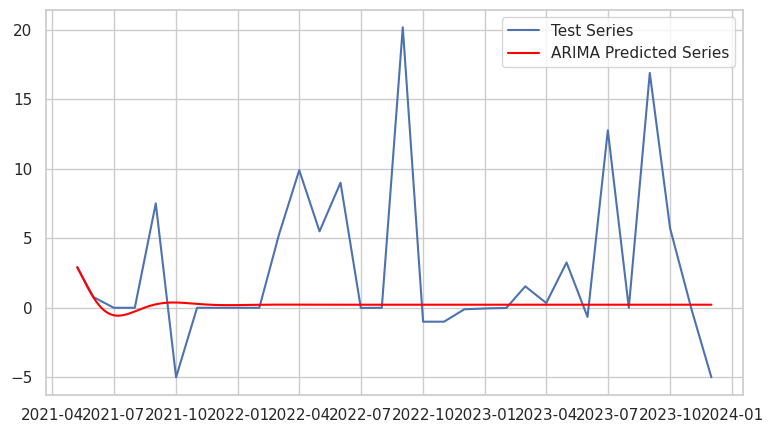

In [69]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Set best order as the values obtained
best_order = (2, 0, 0)

# Fit ARIMA model with the best orders on train set
arima_model = ARIMA(train_super_daily, order=best_order)
arima_fit = arima_model.fit()

# Display the summary of the model
print(arima_fit.summary())

# Determine the number of observations for the forecast
forecast_length = len(test_super_daily)

# Forecast using the ARIMA model
arima_pred = arima_fit.predict(start=len(train_super_daily), end=len(train_super_daily) + forecast_length - 1, dynamic=False)

# Calculate MAE and RMSE
mae_arima = mean_absolute_error(test_super_daily, arima_pred)
rmse_arima = np.sqrt(mean_squared_error(test_super_daily, arima_pred))
print("\n")
print(f"ARIMA Model - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")

# Plot forecasts against actual outcomes
plt.figure(figsize=(9, 5))
plt.plot(test_super_daily, label='Test Series')
plt.plot(test_super_daily.index, arima_pred, color='red', label='ARIMA Predicted Series')
plt.legend()
plt.show()

An MAE of 3.34 suggests that, on average, the forecast of your ARIMA model deviates from the actual values by 3.38 units. The RMSE of 5.25 implies a larger error magnitude than the MAE (since RMSE gives more weight to larger errors).

**Hypertuning ARIMA using GridSearch**

In [70]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings

# Define the p, d, and q ranges
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

best_aic = float('inf')
best_pdq = None
best_model = None

warnings.filterwarnings("ignore") # Ignore convergence warnings

# Grid search over pdq combinations
for param in pdq:
    try:
        temp_model = ARIMA(train_super_daily, order=param)
        results = temp_model.fit()

        # Check if this model's AIC is lower than the current best
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

warnings.resetwarnings()

print(f'Best ARIMA Model: ARIMA{best_pdq} - AIC:{best_aic}')

Best ARIMA Model: ARIMA(2, 0, 0) - AIC:-12793.233423993053


After hypertuning using GridSearch our best ARIMA Model is still (2,0,0)

# SARIMA

**Best SARIMA Order**

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

# Define the range for p, d, q, P, D, Q, and the seasonal period S
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 12  # Assuming a monthly seasonality, change this as per your data

# Generate all combinations of SARIMA parameters
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(P, D, Q))]

best_aic = float('inf')
best_pdq = None
best_seasonal_pdq = None
best_model = None

warnings.filterwarnings("ignore")  # Ignore convergence warnings

# Grid search for the optimal SARIMA parameters
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            temp_model = SARIMAX(train_super_daily,
                                 order=param,
                                 seasonal_order=seasonal_param,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # Compare this model's AIC with the best so far
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = seasonal_param
                best_model = results
        except:
            continue

warnings.resetwarnings()

print(f'Best SARIMA Model: SARIMA{best_pdq}x{best_seasonal_pdq} - AIC:{best_aic}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best SARIMA Model: SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:-12712.625264837887


**Building SARIMA Model**

SARIMA Model - MAE: 3.29, RMSE: 4.98


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


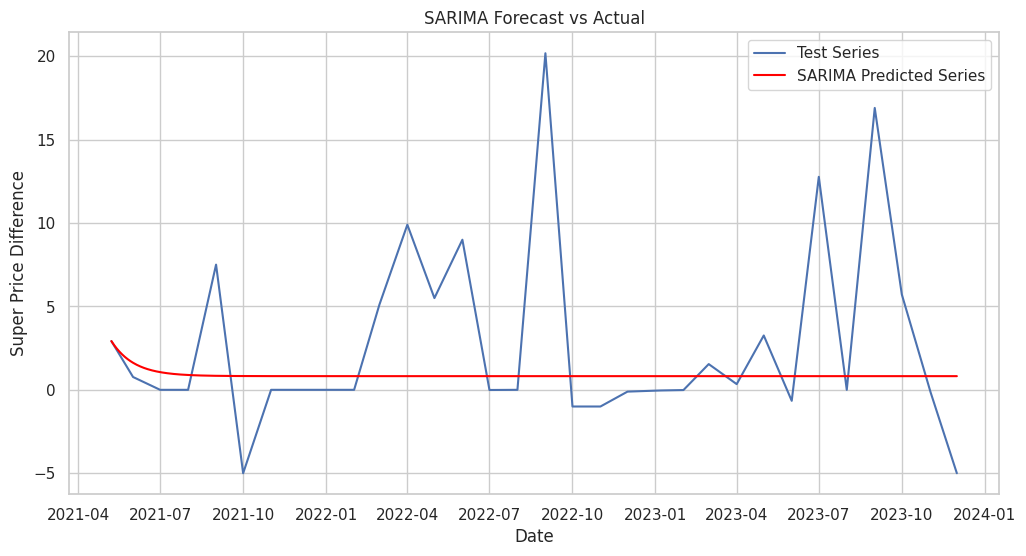

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Fitting the SARIMA model with the identified best order
best_order = (1, 1, 0)
best_seasonal_order = (0, 0, 0, 12)
sarima_model = SARIMAX(train_super_daily['Super'],
                       order=best_order,
                       seasonal_order=best_seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_fit = sarima_model.fit()

# Forecasting
sarima_forecast = sarima_fit.forecast(steps=len(test_super_daily))

# Calculate MAE and RMSE
mae_sarima = mean_absolute_error(test_super_daily, sarima_forecast)
rmse_sarima = np.sqrt(mean_squared_error(test_super_daily, sarima_forecast))

# Display the evaluation metrics
print(f"SARIMA Model - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}")

# Plot forecasts against actual outcomes
plt.figure(figsize=(12, 6))
plt.plot(test_super_daily, label='Test Series')
plt.plot(sarima_forecast, color='red', label='SARIMA Predicted Series')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Super Price Difference')
plt.legend()
plt.show()

This metric indicates that, on average, the predictions of the SARIMA model are approximately 3.29 units away from the actual super fuel prices. The RMSE value of 4.98 implies that the typical deviation of the SARIMA model’s predictions from the actual values is around 4.98 units.

The SARIMA model slightly outperforms the ARIMA model for forecasting super fuel prices in terms of both MAE and RMSE.

**Hypertuning SARIMA using GridSearch**

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import numpy as np
import warnings

# Assuming super_df_daily is your dataset and 'Super' is the target variable
#data = super_df_daily['Super']

# Define the range for p, d, q, P, D, Q, and the seasonal period S
#p = d = q = range(0, 3)  # Non-seasonal parameters
#P = D = Q = range(0, 3)  # Seasonal parameters
#s = 12  # Assuming a monthly seasonality, for yearly seasonality

#best_aic = float('inf')
#best_order = None
#best_seasonal_order = None

# Iterate over all combinations of SARIMA parameters
#for param in itertools.product(p, d, q):
    #for seasonal_param in itertools.product(P, D, Q):
        #try:
            #model = SARIMAX(data,
                            #order=param,
                            #seasonal_order=seasonal_param + (s,),
                            #enforce_stationarity=False,
                            #enforce_invertibility=False)
            #results = model.fit(disp=False)  # Set disp=False to reduce output

            #if results.aic < best_aic:
                #best_aic = results.aic
                #best_order = param
                #best_seasonal_order = seasonal_param
        #except:
            #continue

#print(f"Best SARIMA Model: Order={best_order}, Seasonal Order={best_seasonal_order} with AIC={best_aic}")

# FaceBook Prophet

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

Prophet Model - MAE: 3.30, RMSE: 4.18


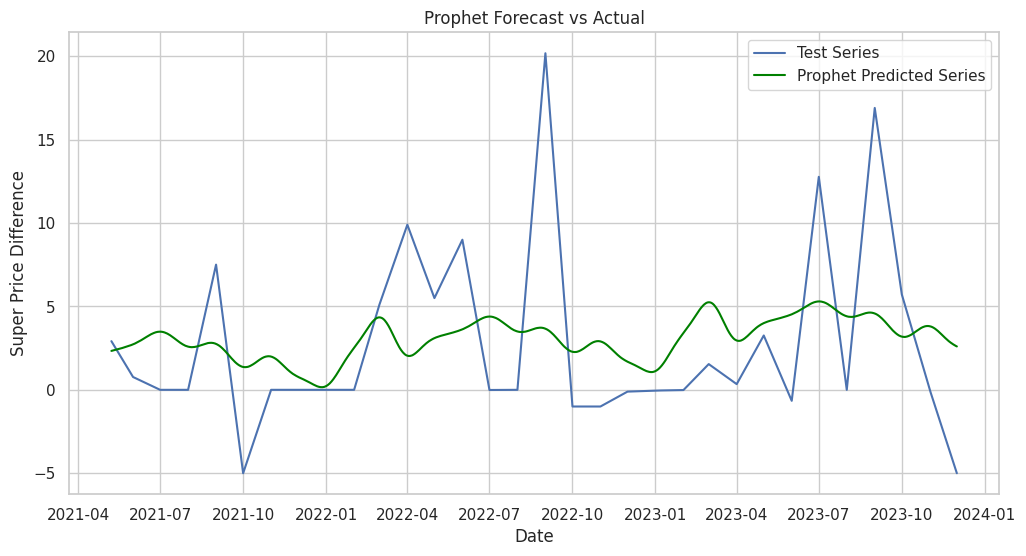

In [74]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data for Prophet
train_df = pd.DataFrame({'ds': train_super_daily.index, 'y': train_super_daily['Super']})
test_df = pd.DataFrame({'ds': test_super_daily.index})

# Create and fit the Prophet model
prophet_model_super = Prophet()
prophet_model_super.fit(train_df)

# Make predictions for the test data
future = prophet_model_super.make_future_dataframe(periods=len(test_super_daily))
forecast = prophet_model_super.predict(future)

# Extract the forecasted values
prophet_forecast = forecast['yhat'][-len(test_super_daily):]

# Calculate MAE and RMSE for Prophet
mae_prophet = mean_absolute_error(test_super_daily, prophet_forecast)
rmse_prophet = np.sqrt(mean_squared_error(test_super_daily, prophet_forecast))

# Display the evaluation metrics
print(f"Prophet Model - MAE: {mae_prophet:.2f}, RMSE: {rmse_prophet:.2f}")

# Plot Prophet's forecasts against actual outcomes
plt.figure(figsize=(12, 6))
plt.plot(test_super_daily, label='Test Series')
plt.plot(test_super_daily.index, prophet_forecast, color='green', label='Prophet Predicted Series')
plt.title('Prophet Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Super Price Difference')
plt.legend()
plt.show()

The Prophet model's MAE of 3.30 indicates that, on average, the model's predictions are about 3.30 units away from the actual super fuel prices.The RMSE of 4.18 for the Prophet model implies that the typical deviation of its predictions from the actual values is around 4.18 units.

The Prophet model demonstrates a strong balance between average prediction accuracy and the handling of larger prediction errors for forecasting super fuel prices. Its significantly lower RMSE suggests it is particularly effective at minimizing larger deviations, which can be crucial in practical forecasting scenarios.

# LSTM

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

Epoch 1/100
122/122 - 2s - loss: 0.0225 - 2s/epoch - 19ms/step
Epoch 2/100
122/122 - 0s - loss: 0.0123 - 285ms/epoch - 2ms/step
Epoch 3/100
122/122 - 0s - loss: 0.0147 - 290ms/epoch - 2ms/step
Epoch 4/100
122/122 - 0s - loss: 0.0130 - 312ms/epoch - 3ms/step
Epoch 5/100
122/122 - 0s - loss: 0.0125 - 236ms/epoch - 2ms/step
Epoch 6/100
122/122 - 0s - loss: 0.0143 - 202ms/epoch - 2ms/step
Epoch 7/100
122/122 - 0s - loss: 0.0136 - 197ms/epoch - 2ms/step
Epoch 8/100
122/122 - 0s - loss: 0.0126 - 198ms/epoch - 2ms/step
Epoch 9/100
122/122 - 0s - loss: 0.0120 - 208ms/epoch - 2ms/step
Epoch 10/100
122/122 - 0s - loss: 0.0118 - 210ms/epoch - 2ms/step
Epoch 11/100
122/122 - 0s - loss: 0.0117 - 203ms/epoch - 2ms/step
Epoch 12/100
122/122 - 0s - loss: 0.0122 - 200ms/epoch - 2ms/step
Epoch 13/100
122/122 - 0s - loss: 0.0133 - 191ms/epoch - 2ms/step
Epoch 14/100
122/122 - 0s - loss: 0.0129 - 211ms/epoch - 2ms/step
Epoch 15/100
122/122 - 0s - loss: 0.0126 - 185ms/epoch - 2ms/step
Epoch 16/100
122/122 

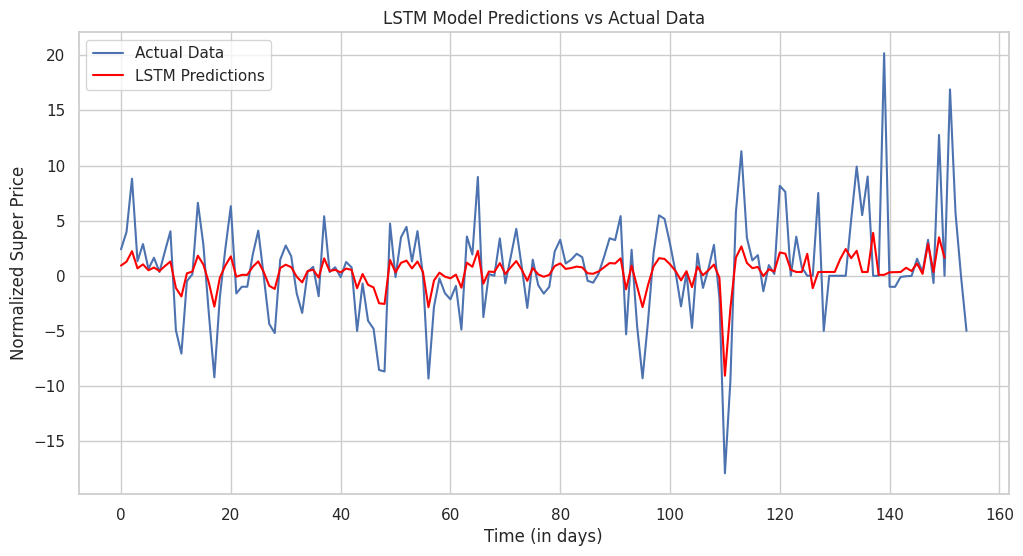

In [75]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Super_df['Super'] is the dataset
data = super_df['Super'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1
look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate root mean squared error and MAE
train_score_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
train_score_mae = mean_absolute_error(Y_train[0], train_predict[:,0])
test_score_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
test_score_mae = mean_absolute_error(Y_test[0], test_predict[:,0])

# Print evaluation metrics
print(f'Train RMSE: {train_score_rmse:.2f}, Train MAE: {train_score_mae:.2f}')
print(f'Test RMSE: {test_score_rmse:.2f}, Test MAE: {test_score_mae:.2f}')

# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data_scaled), label='Actual Data')
plt.plot(np.concatenate((train_predict, test_predict)), color='red', label='LSTM Predictions')
plt.title('LSTM Model Predictions vs Actual Data')
plt.xlabel('Time (in days)')
plt.ylabel('Normalized Super Price')
plt.legend()
plt.show()


The MAE of 4.02 indicates that, on average, the LSTM model's predictions deviate from the actual Super fuel prices by approximately 4.02 units. An RMSE of 6.09 suggests that the typical deviation of the LSTM model’s predictions from the actual values is around 6.09 units.

The Facebook Prophet model appears to be the most effective for forecasting Super fuel prices, offering the best balance between average accuracy and managing larger errors.

# Forecasting Prediction Comparison

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


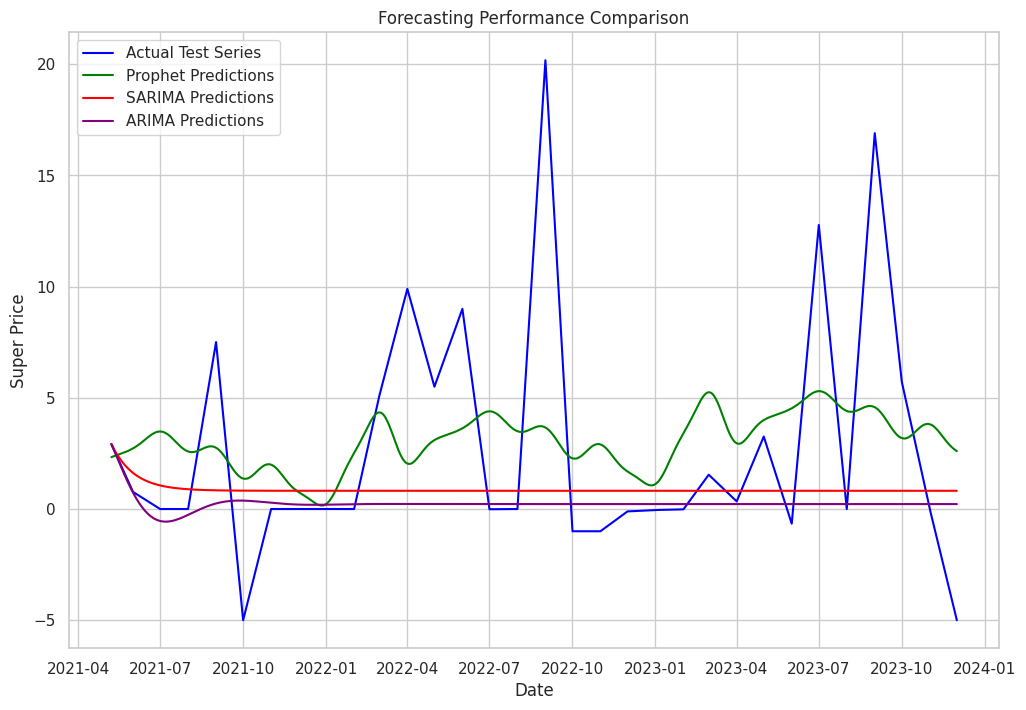

In [76]:
# Prepare the plot
plt.figure(figsize=(12, 8))

# Plotting the actual test data
plt.plot(test_super_daily, label='Actual Test Series', color='blue')

# Plotting the forecasts
plt.plot(test_super_daily.index, prophet_forecast, color='green', label='Prophet Predictions')
plt.plot(test_super_daily.index, sarima_forecast, color='red', label='SARIMA Predictions')
plt.plot(test_super_daily.index, arima_pred, color='purple', label='ARIMA Predictions')

# Adding plot labels and legend
plt.title('Forecasting Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Super Price')
plt.legend()

# Display the plot
plt.show()

# 5 year forecast of Super Prices

We will use our best performing model Facebook prophet to predict super prices for the next 5 years.

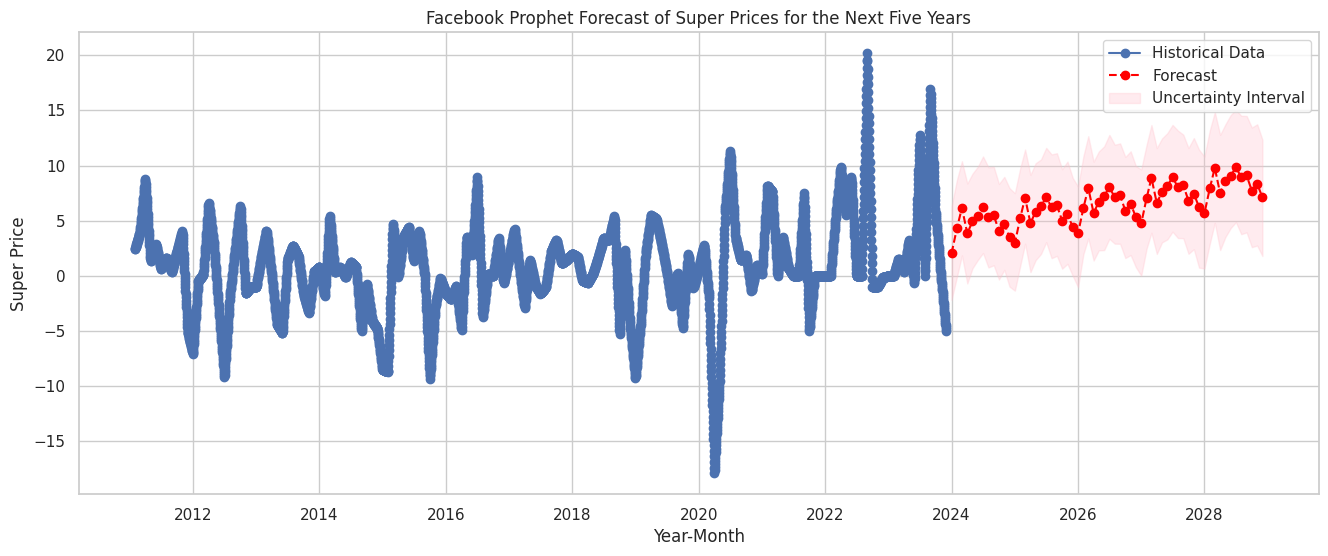

In [77]:
# Generate future dates for the next five years (60 months)
future_five_years = pd.DataFrame({'ds': pd.date_range(start=super_df_daily.index[-1] + pd.DateOffset(months=1), periods=60, freq='MS')})

# Make predictions for the next five years
forecast_five_years = prophet_model_super.predict(future_five_years)

# Plot the historical data and the forecast
plt.figure(figsize=(16, 6))
plt.plot(super_df_daily.index, super_df_daily['Super'], label='Historical Data', marker='o')
plt.plot(forecast_five_years['ds'], forecast_five_years['yhat'], label='Forecast', linestyle='dashed', marker='o', color='red')
plt.fill_between(forecast_five_years['ds'], forecast_five_years['yhat_lower'], forecast_five_years['yhat_upper'],
                 color='pink', alpha=0.3, label='Uncertainty Interval')

plt.title('Facebook Prophet Forecast of Super Prices for the Next Five Years')
plt.xlabel('Year-Month')
plt.ylabel('Super Price')
plt.legend()
plt.show()

# Diesel

In [78]:
columns_to_drop = ['Super', 'Kerosene', 'Average Exchange Rate']
diesel=monthly_avg_prices.drop(columns_to_drop, axis=1)
diesel.head()

Year-Month      Diesel
0 2011-01-01   90.614135
1 2011-02-01   93.022530
2 2011-03-01   96.171242
3 2011-04-01  108.725395
4 2011-05-01  107.982194

**Make Year-Month the index**

In [79]:
# Set the month-year column as the index
diesel.set_index('Year-Month', inplace=True)

In [80]:
diesel.index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Year-Month', length=156, freq=None)

In [81]:
diesel.head(10)

Diesel
Year-Month            
2011-01-01   90.614135
2011-02-01   93.022530
2011-03-01   96.171242
2011-04-01  108.725395
2011-05-01  107.982194
2011-06-01  108.324917
2011-07-01  108.239257
2011-08-01  110.974973
2011-09-01  110.176910
2011-10-01  112.326310

**Visualize diesel price data**

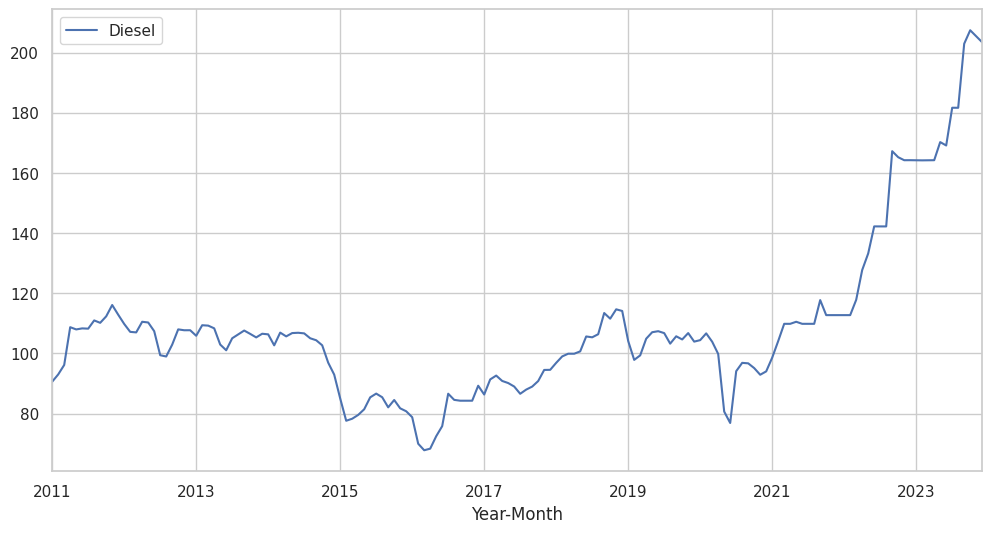

In [82]:
# Visualize the diesel prices time series data
diesel.plot(figsize=(12, 6))

plt.show()

From 2011 to 2012, there was a steady rise in super fuel prices, climbing from 100 to 120. Subsequently, the prices experienced variable fluctuations until 2015, when a significant decline was observed. A period of price recovery ensued from 2016 to 2017. Remarkably, post-2017, there was a continuous upward trend in prices, culminating at 120 by 2019. A decline was noted in 2020, followed by a marked increase in prices beginning in 2021, a trend that persisted through 2023.

**Testing for trends/stationarity**

In [83]:
#DickeyFuller Test on diesel

# Perform Dickey-Fuller test
result = adfuller(diesel)

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# Compare p-value to a significance level to make a decision about stationarity
if p_value <= 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely non-stationary.')

Test Statistic: 1.6010549923155608
P-value: 0.997860737406384
The time series is likely non-stationary.


The time series is not stationary as the P-value is higher than the significance level of 0.05. We will do differencing to try and make the time series stationary.

In [84]:
# Differencing the time series
diff = diesel.diff().dropna()

# Perform ADF test on the differenced series
result_diff = adfuller(diff)

# Extract and print the test statistic and p-value
test_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]

print(f'Test Statistic (After Differencing): {test_statistic_diff}')
print(f'P-value (After Differencing): {p_value_diff}')

# Compare p-value to a significance level to make a decision about stationarity
if p_value_diff <= 0.05:
    print('The differenced time series is likely stationary.')
else:
    print('The differenced time series is likely non-stationary.')

Test Statistic (After Differencing): -10.543331218627653
P-value (After Differencing): 8.53784918409916e-19
The differenced time series is likely stationary.


The time series is now stationary

**Plotting PACF & ACF**

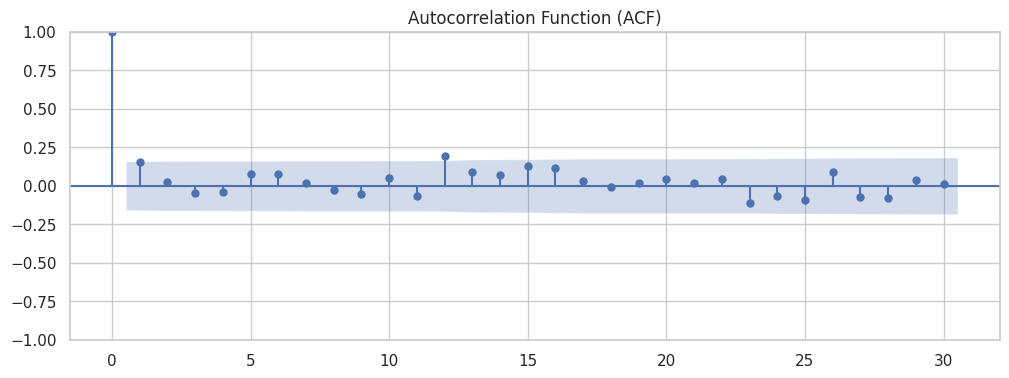

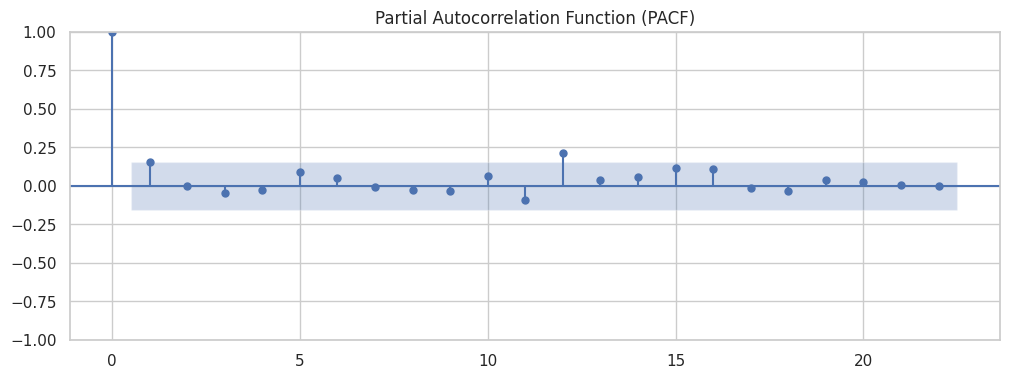

In [85]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(diff, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(diff, lags=22, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [86]:
diff.head()

Diesel
Year-Month           
2011-02-01   2.408395
2011-03-01   3.148712
2011-04-01  12.554152
2011-05-01  -0.743200
2011-06-01   0.342723

In [87]:
diesel_df=diff
diesel_df.head()

Diesel
Year-Month           
2011-02-01   2.408395
2011-03-01   3.148712
2011-04-01  12.554152
2011-05-01  -0.743200
2011-06-01   0.342723

In [88]:
diesel_df.isnull().sum()

Diesel    0
dtype: int64

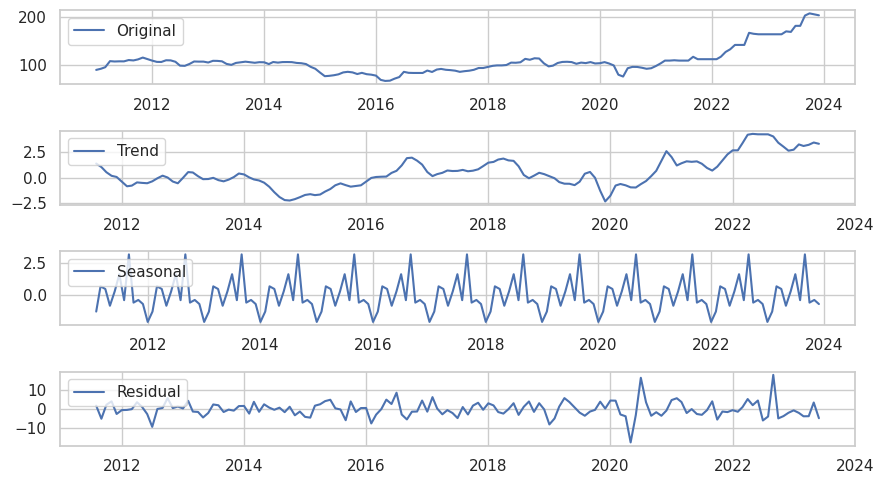

In [89]:
# Decomposition for Diesel Prices with a 12-month period
tsd_result = seasonal_decompose(diesel_df['Diesel'], model='additive', period=12)

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(9, 5))
plt.subplot(4, 1, 1)
plt.plot(diesel, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(tsd_result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(tsd_result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(tsd_result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In the seasonal component there is are periodic patterns therefore suggesting the presence of seasonality in the time series.

**Upsampling from monthly to daily**

In [90]:
# Ensure the index is a DatetimeIndex
diesel_df.index = pd.to_datetime(diesel_df.index)

# Upsampling the dataset from monthly to daily frequency
diesel_df_daily = diesel_df.resample('D').interpolate(method='linear')

In [91]:
diesel_df_daily.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Diesel
Year-Month          
2011-02-01  2.408395
2011-02-02  2.434835
2011-02-03  2.461274
2011-02-04  2.487714
2011-02-05  2.514154
2011-02-06  2.540594
2011-02-07  2.567034
2011-02-08  2.593474
2011-02-09  2.619914
2011-02-10  2.646354

In [93]:
diesel_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4687 entries, 2011-02-01 to 2023-12-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Diesel  4687 non-null   float64
dtypes: float64(1)
memory usage: 73.2 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
from sklearn.model_selection import train_test_split

# Splitting the upsampled data into train and test sets
train_diesel_daily, test_diesel_daily = train_test_split(diesel_df_daily, test_size=0.2, shuffle=False)

# Displaying the first few rows of the upsampled dataset and the splits
diesel_df_daily.head(), train_diesel_daily.head(), test_diesel_daily.head()

(              Diesel
 Year-Month          
 2011-02-01  2.408395
 2011-02-02  2.434835
 2011-02-03  2.461274
 2011-02-04  2.487714
 2011-02-05  2.514154,
               Diesel
 Year-Month          
 2011-02-01  2.408395
 2011-02-02  2.434835
 2011-02-03  2.461274
 2011-02-04  2.487714
 2011-02-05  2.514154,
               Diesel
 Year-Month          
 2021-05-08  0.373722
 2021-05-09  0.329751
 2021-05-10  0.285781
 2021-05-11  0.241810
 2021-05-12  0.197839)

# ARIMA

**Best ARIMA Order**

In [95]:
#Best ARIMA order

from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define a range of p, d, and q values to try
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

best_aic = np.inf
best_order = None

# Trying different combinations of p, d, and q
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(diesel_df_daily['Diesel'], order=(p, d, q))
                model_fit = model.fit()
                print(f'ARIMA({p},{d},{q}) - AIC:{model_fit.aic}')

                # Check if this model has the lowest AIC
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, d, q)
            except:
                continue

print('Best ARIMA order:', best_order)

ARIMA(0,0,0) - AIC:26621.511697527494


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0,0,1) - AIC:20175.31558837653


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0,0,2) - AIC:14173.112753697926


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0,0,3) - AIC:9073.116510776354
ARIMA(0,1,0) - AIC:-1382.7387482550166
ARIMA(0,1,1) - AIC:-6007.705583052617
ARIMA(0,1,2) - AIC:-8510.051529137223
ARIMA(0,1,3) - AIC:-9885.232137090548
ARIMA(1,0,0) - AIC:-1376.7219596824093
ARIMA(1,0,1) - AIC:-6002.313958262797
ARIMA(1,0,2) - AIC:-8505.745646827148
ARIMA(1,0,3) - AIC:-9882.310992169092
ARIMA(1,1,0) - AIC:-12592.537981774276
ARIMA(1,1,1) - AIC:-12593.092587723793
ARIMA(1,1,2) - AIC:-12593.631610990717
ARIMA(1,1,3) - AIC:-12594.131744452076
ARIMA(2,0,0) - AIC:-12709.753743028665
ARIMA(2,0,1) - AIC:-12707.788276059753
ARIMA(2,0,2) - AIC:-12705.799486278018
ARIMA(2,0,3) - AIC:-12703.800082485472
ARIMA(2,1,0) - AIC:-12593.223832941152


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2,1,1) - AIC:-12588.95623485676


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2,1,2) - AIC:-12589.552638563506


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2,1,3) - AIC:-12590.097200106535
ARIMA(3,0,0) - AIC:-12707.788158843188
ARIMA(3,0,1) - AIC:-12705.76773135388
ARIMA(3,0,2) - AIC:-12703.798914892714


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,0,3) - AIC:-12561.14759245227
ARIMA(3,1,0) - AIC:-12594.042518346605
ARIMA(3,1,1) - AIC:-12590.623147642922


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

ARIMA(3,1,2) - AIC:-12667.477815235507
ARIMA(3,1,3) - AIC:-12670.02051549974
Best ARIMA order: (2, 0, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Building ARIMA Model**

                               SARIMAX Results                                
Dep. Variable:                 Diesel   No. Observations:                 3749
Model:                 ARIMA(2, 0, 0)   Log Likelihood                6081.215
Date:                Tue, 30 Jan 2024   AIC                         -12154.429
Time:                        06:56:48   BIC                         -12129.512
Sample:                    02-01-2011   HQIC                        -12145.568
                         - 05-07-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1447      0.367      0.394      0.693      -0.575       0.864
ar.L1          1.9568      0.006    335.835      0.000       1.945       1.968
ar.L2         -0.9589      0.006   -163.431      0.0

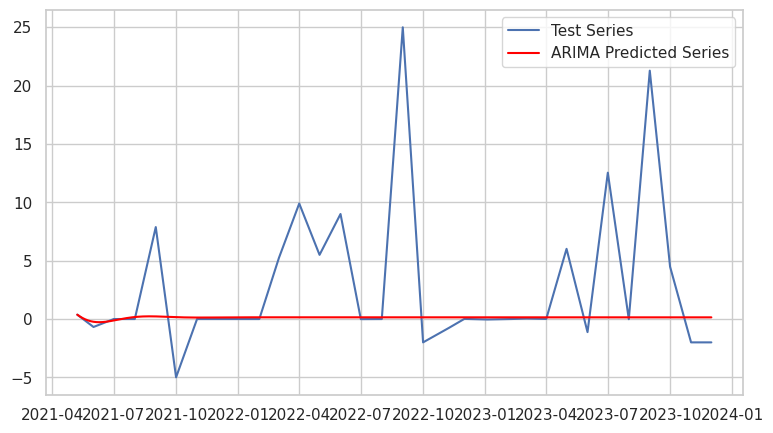

In [96]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Set best order as the values obtained
best_order = (2, 0, 0)

# Fit ARIMA model with the best orders on train set
arima_model = ARIMA(train_diesel_daily, order=best_order)
arima_fit = arima_model.fit()

# Display the summary of the model
print(arima_fit.summary())

# Determine the number of observations for the forecast
forecast_length = len(test_diesel_daily)

# Forecast using the ARIMA model
arima_pred = arima_fit.predict(start=len(train_diesel_daily), end=len(train_diesel_daily) + forecast_length - 1, dynamic=False)

# Calculate MAE and RMSE
mae_arima = mean_absolute_error(test_diesel_daily, arima_pred)
rmse_arima = np.sqrt(mean_squared_error(test_diesel_daily, arima_pred))
print("\n")
print(f"ARIMA Model - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")

# Plot forecasts against actual outcomes
plt.figure(figsize=(9, 5))
plt.plot(test_diesel_daily, label='Test Series')
plt.plot(test_diesel_daily.index, arima_pred, color='red', label='ARIMA Predicted Series')
plt.legend()
plt.show()

An MAE of 3.59 suggests that, on average, the forecast of your ARIMA model deviates from the actual values by 3.59 units. The RMSE of 5.99 implies a larger error magnitude than the MAE (since RMSE gives more weight to larger errors).

**Hypertuning ARIMA using GridSearch**

In [97]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings

# Define the p, d, and q ranges
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

best_aic = float('inf')
best_pdq = None
best_model = None

warnings.filterwarnings("ignore") # Ignore convergence warnings

# Grid search over pdq combinations
for param in pdq:
    try:
        temp_model = ARIMA(train_diesel_daily, order=param)
        results = temp_model.fit()

        # Check if this model's AIC is lower than the current best
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

warnings.resetwarnings()

print(f'Best ARIMA Model: ARIMA{best_pdq} - AIC:{best_aic}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best ARIMA Model: ARIMA(2, 0, 0) - AIC:-12154.429098812065


After hypertuning using GridSearch our best ARIMA Model is still (2,0,0)

# SARIMA

**Best SARIMA Order**

In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

# Define the range for p, d, q, P, D, Q, and the seasonal period S
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 12  # Assuming a monthly seasonality, change this as per your data

# Generate all combinations of SARIMA parameters
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(P, D, Q))]

best_aic = float('inf')
best_pdq = None
best_seasonal_pdq = None
best_model = None

warnings.filterwarnings("ignore")  # Ignore convergence warnings

# Grid search for the optimal SARIMA parameters
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            temp_model = SARIMAX(train_diesel_daily,
                                 order=param,
                                 seasonal_order=seasonal_param,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # Compare this model's AIC with the best so far
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = seasonal_param
                best_model = results
        except:
            continue

warnings.resetwarnings()

print(f'Best SARIMA Model: SARIMA{best_pdq}x{best_seasonal_pdq} - AIC:{best_aic}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best SARIMA Model: SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:-12063.924866576319


**Building SARIMA Model**

SARIMA Model - MAE: 3.98, RMSE: 6.37


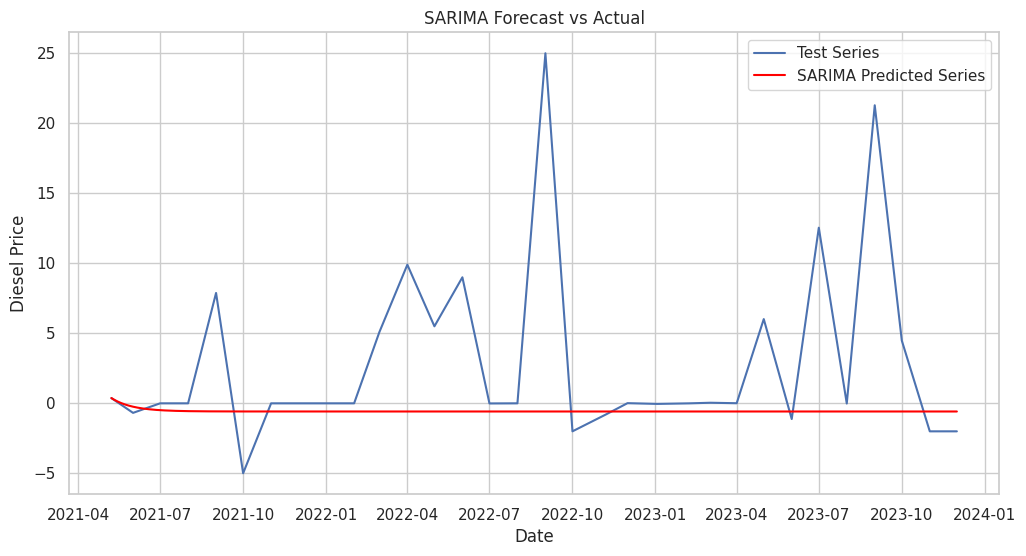

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Fitting the SARIMA model with the identified best order
best_order = (1, 1, 0)
best_seasonal_order = (0, 0, 0, 12)
sarima_model = SARIMAX(train_diesel_daily['Diesel'],
                       order=best_order,
                       seasonal_order=best_seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_fit = sarima_model.fit()

# Forecasting
sarima_forecast = sarima_fit.forecast(steps=len(test_diesel_daily))

# Calculate MAE and RMSE
mae_sarima = mean_absolute_error(test_diesel_daily, sarima_forecast)
rmse_sarima = np.sqrt(mean_squared_error(test_diesel_daily, sarima_forecast))

# Display the evaluation metrics
print(f"SARIMA Model - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}")

# Plot forecasts against actual outcomes
plt.figure(figsize=(12, 6))
plt.plot(test_diesel_daily, label='Test Series')
plt.plot(sarima_forecast, color='red', label='SARIMA Predicted Series')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Diesel Price')
plt.legend()
plt.show()

This value indicates that, on average, the predictions of the SARIMA model deviate from the actual values by approximately 3.98 units. The RMSE value of 6.37 indicates that the typical deviation of the model’s predictions from the actual values is about 6.37 units.

Both the MAE and RMSE are lower for the ARIMA model compared to the SARIMA model. This indicates that the ARIMA model generally performs better in terms of both average error magnitude and handling larger errors for this particular dataset.

**Hypertuning SARIMA using GridSearch**

In [100]:
import itertools
import numpy as np
import warnings

# Assuming diesel_df_daily is your dataset and 'Diesel' is the target variable
#data = diesel_df_daily['Diesel']

# Define the range for p, d, q, P, D, Q, and the seasonal period S
#p = d = q = range(0, 3)  # Non-seasonal parameters
#P = D = Q = range(0, 3)  # Seasonal parameters
#s = 12  # Assuming a monthly seasonality, for yearly seasonality

#best_aic = float('inf')
#best_order = None
#best_seasonal_order = None

# Iterate over all combinations of SARIMA parameters
#for param in itertools.product(p, d, q):
    #for seasonal_param in itertools.product(P, D, Q):
        #try:
            #model = SARIMAX(data,
                            #order=param,
                            #seasonal_order=seasonal_param + (s,),
                            #enforce_stationarity=False,
                            #enforce_invertibility=False)
            #results = model.fit(disp=False)  # Set disp=False to reduce output

            #if results.aic < best_aic:
                #best_aic = results.aic
                #best_order = param
                #best_seasonal_order = seasonal_param
        #except:
            #continue

#print(f"Best SARIMA Model: Order={best_order}, Seasonal Order={best_seasonal_order} with AIC={best_aic}")

# FaceBook Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjaoubn2i/gll2_3xf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjaoubn2i/oln1v3fl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52870', 'data', 'file=/tmp/tmpjaoubn2i/gll2_3xf.json', 'init=/tmp/tmpjaoubn2i/oln1v3fl.json', 'output', 'file=/tmp/tmpjaoubn2i/prophet_model845uabz4/prophet_model-20240130070053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:00:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:00:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model - MAE: 3.55, RMSE: 5.07


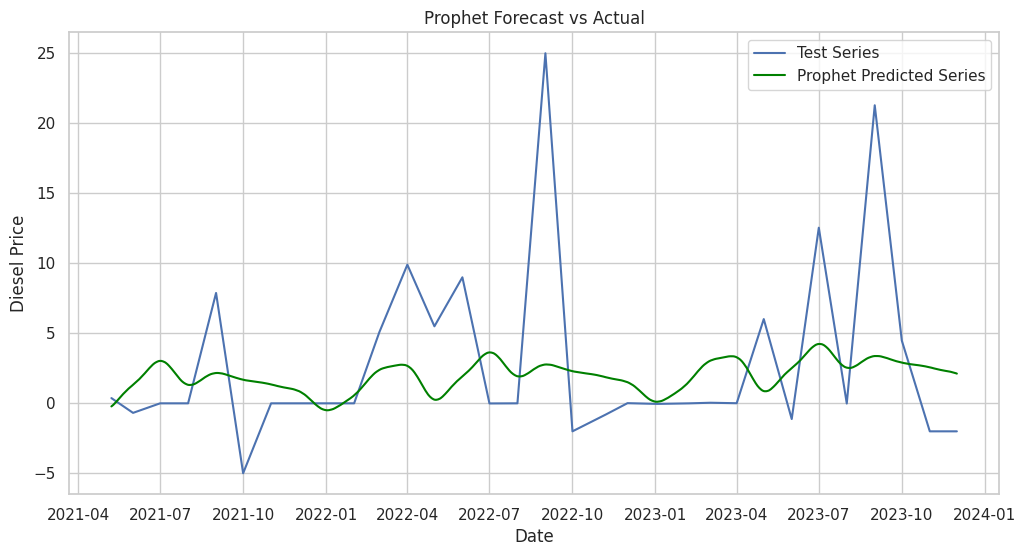

In [101]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data for Prophet
train_df = pd.DataFrame({'ds': train_diesel_daily.index, 'y': train_diesel_daily['Diesel']})
test_df = pd.DataFrame({'ds': test_diesel_daily.index})

# Create and fit the Prophet model
prophet_model_diesel = Prophet()
prophet_model_diesel.fit(train_df)

# Make predictions for the test data
future = prophet_model_diesel.make_future_dataframe(periods=len(test_diesel_daily))
forecast = prophet_model_diesel.predict(future)

# Extract the forecasted values
prophet_forecast = forecast['yhat'][-len(test_diesel_daily):]

# Calculate MAE and RMSE for Prophet
mae_prophet = mean_absolute_error(test_diesel_daily, prophet_forecast)
rmse_prophet = np.sqrt(mean_squared_error(test_diesel_daily, prophet_forecast))

# Display the evaluation metrics
print(f"Prophet Model - MAE: {mae_prophet:.2f}, RMSE: {rmse_prophet:.2f}")

# Plot Prophet's forecasts against actual outcomes
plt.figure(figsize=(12, 6))
plt.plot(test_diesel_daily, label='Test Series')
plt.plot(test_diesel_daily.index, prophet_forecast, color='green', label='Prophet Predicted Series')
plt.title('Prophet Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Diesel Price')
plt.legend()
plt.show()

This value indicates that, on average, the predictions of the Prophet model are about 3.55 units away from the actual values. It is slightly lower than the ARIMA model's MAE of 3.59 and the SARIMA model's MAE of 3.98, suggesting a marginally better average accuracy.The RMSE of 5.07 suggests that the typical deviation of the Prophet model’s predictions from the actual values is around 5.07 units, which is lower than both the ARIMA model's RMSE of 5.99 and the SARIMA model's RMSE of 6.37. This indicates a better performance of the Prophet model in terms of larger errors and outliers.

The Prophet model demonstrates the best balance between average accuracy (MAE) and the handling of larger errors (RMSE) among the three models.

# LSTM

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/100
122/122 - 3s - loss: 0.0181 - 3s/epoch - 21ms/step
Epoch 2/100
122/122 - 0s - loss: 0.0102 - 210ms/epoch - 2ms/step
Epoch 3/100
122/122 - 0s - loss: 0.0103 - 215ms/epoch - 2ms/step
Epoch 4/100
122/122 - 0s - loss: 0.0100 - 204ms/epoch - 2ms/step
Epoch 5/100
122/122 - 0s - loss: 0.0094 - 214ms/epoch - 2ms/step
Epoch 6/100
122/122 - 0s - loss: 0.0095 - 214ms/epoch - 2ms/step
Epoch 7/100
122/122 - 0s - loss: 0.0100 - 202ms/epoch - 2ms/step
Epoch 8/100
122/122 - 0s - loss: 0.0100 - 201ms/epoch - 2ms/step
Epoch 9/100
122/122 - 0s - loss: 0.0092 - 215ms/epoch - 2ms/step
Epoch 10/100
122/122 - 0s - loss: 0.0094 - 208ms/epoch - 2ms/step
Epoch 11/100
122/122 - 0s - loss: 0.0091 - 194ms/epoch - 2ms/step
Epoch 12/100
122/122 - 0s - loss: 0.0093 - 203ms/epoch - 2ms/step
Epoch 13/100
122/122 - 0s - loss: 0.0093 - 203ms/epoch - 2ms/step
Epoch 14/100
122/122 - 0s - loss: 0.0100 - 198ms/epoch - 2ms/step
Epoch 15/100
122/122 - 0s - loss: 0.0092 - 219ms/epoch - 2ms/step
Epoch 16/100
122/122 

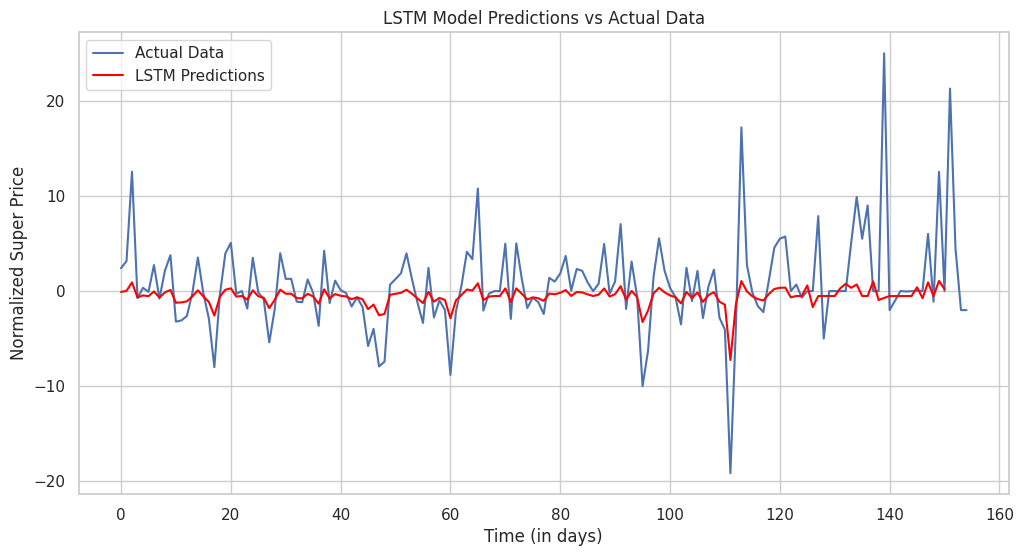

In [102]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Kerosene_df['Kerosene'] is the dataset
data = diesel_df['Diesel'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1
look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate root mean squared error and MAE
train_score_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
train_score_mae = mean_absolute_error(Y_train[0], train_predict[:,0])
test_score_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
test_score_mae = mean_absolute_error(Y_test[0], test_predict[:,0])

# Print evaluation metrics
print(f'Train RMSE: {train_score_rmse:.2f}, Train MAE: {train_score_mae:.2f}')
print(f'Test RMSE: {test_score_rmse:.2f}, Test MAE: {test_score_mae:.2f}')

# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data_scaled), label='Actual Data')
plt.plot(np.concatenate((train_predict, test_predict)), color='red', label='LSTM Predictions')
plt.title('LSTM Model Predictions vs Actual Data')
plt.xlabel('Time (in days)')
plt.ylabel('Normalized Super Price')
plt.legend()
plt.show()


The MAE of 4.49 indicates that, on average, the LSTM model's predictions deviate from the actual diesel prices by about 4.49 units. An RMSE of 7.73 suggests that the typical deviation of the LSTM model’s predictions from the actual values is around 7.73 units.

The Facebook Prophet model appears to be the most effective for diesel price forecasting, offering the best balance between average accuracy and managing larger errors.

# Forecasting Prediction Comparison

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


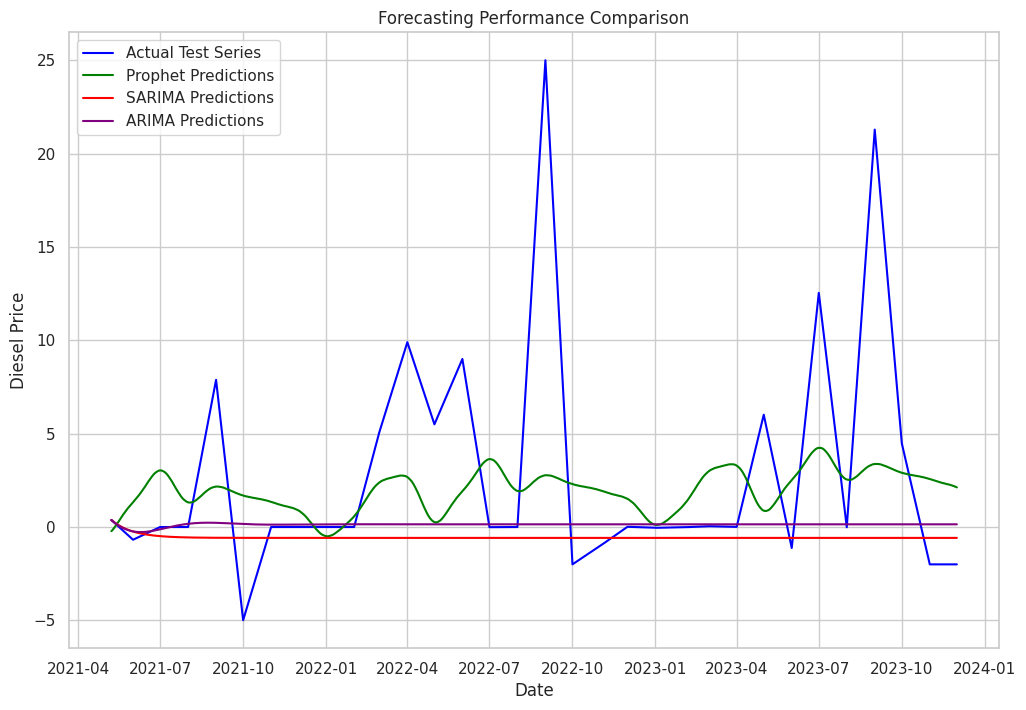

In [103]:
# Prepare the plot
plt.figure(figsize=(12, 8))

# Plotting the actual test data
plt.plot(test_diesel_daily, label='Actual Test Series', color='blue')

# Plotting the forecasts
plt.plot(test_diesel_daily.index, prophet_forecast, color='green', label='Prophet Predictions')
plt.plot(test_diesel_daily.index, sarima_forecast, color='red', label='SARIMA Predictions')
plt.plot(test_diesel_daily.index, arima_pred, color='purple', label='ARIMA Predictions')

# Adding plot labels and legend
plt.title('Forecasting Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Diesel Price')
plt.legend()

# Display the plot
plt.show()

# 5 year forecast of Diesel Prices

We will use our best performing model Facebook prophet to predict super prices for the next 5 years.

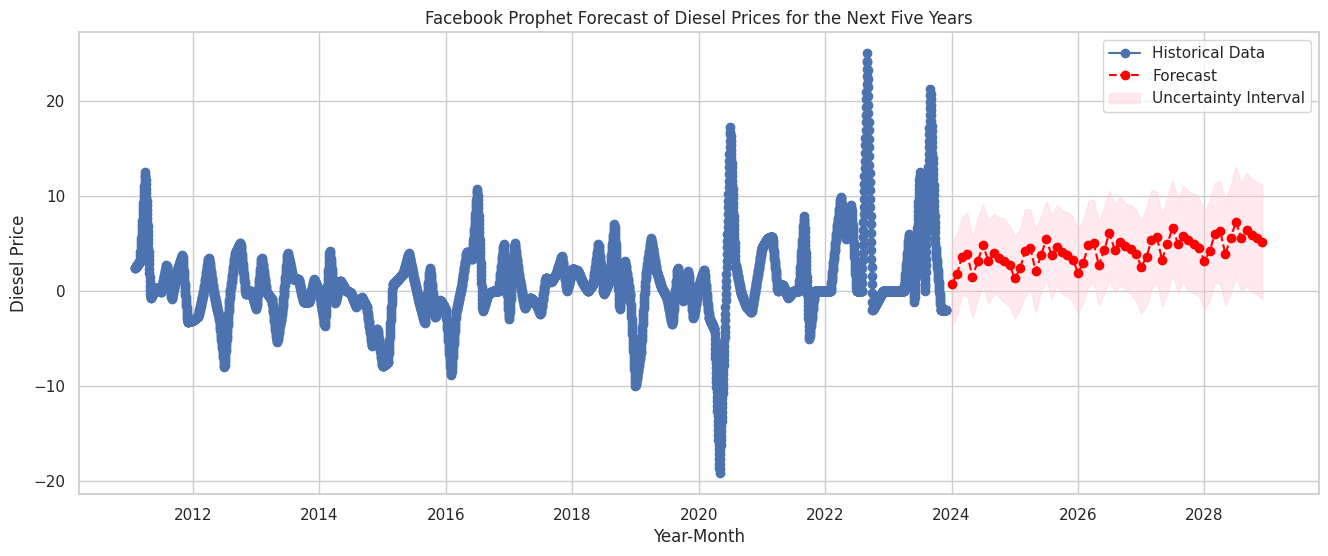

In [104]:
# Generate future dates for the next five years (60 months)
future_five_years = pd.DataFrame({'ds': pd.date_range(start=diesel_df_daily.index[-1] + pd.DateOffset(months=1), periods=60, freq='MS')})

# Make predictions for the next five years
forecast_five_years = prophet_model_diesel.predict(future_five_years)

# Plot the historical data and the forecast
plt.figure(figsize=(16, 6))
plt.plot(diesel_df_daily.index, diesel_df_daily['Diesel'], label='Historical Data', marker='o')
plt.plot(forecast_five_years['ds'], forecast_five_years['yhat'], label='Forecast', linestyle='dashed', marker='o', color='red')
plt.fill_between(forecast_five_years['ds'], forecast_five_years['yhat_lower'], forecast_five_years['yhat_upper'],
                 color='pink', alpha=0.3, label='Uncertainty Interval')

plt.title('Facebook Prophet Forecast of Diesel Prices for the Next Five Years')
plt.xlabel('Year-Month')
plt.ylabel('Diesel Price')
plt.legend()
plt.show()

# Kerosene

In [105]:
columns_to_drop = ['Super', 'Diesel', 'Average Exchange Rate']
kerosene=monthly_avg_prices.drop(columns_to_drop, axis=1)
kerosene.head()

Year-Month   Kerosene
0 2011-01-01  79.405278
1 2011-02-01  81.378934
2 2011-03-01  85.477435
3 2011-04-01  92.569070
4 2011-05-01  91.569692

**Make Year-Month the index**

In [106]:
# Set the month-year column as the index
kerosene.set_index('Year-Month', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
kerosene.index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Year-Month', length=156, freq=None)

In [108]:
kerosene.head(10)

Kerosene
Year-Month           
2011-01-01  79.405278
2011-02-01  81.378934
2011-03-01  85.477435
2011-04-01  92.569070
2011-05-01  91.569692
2011-06-01  87.675140
2011-07-01  88.203586
2011-08-01  90.916691
2011-09-01  90.249948
2011-10-01  91.570748

**Visualize kerosene price data**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


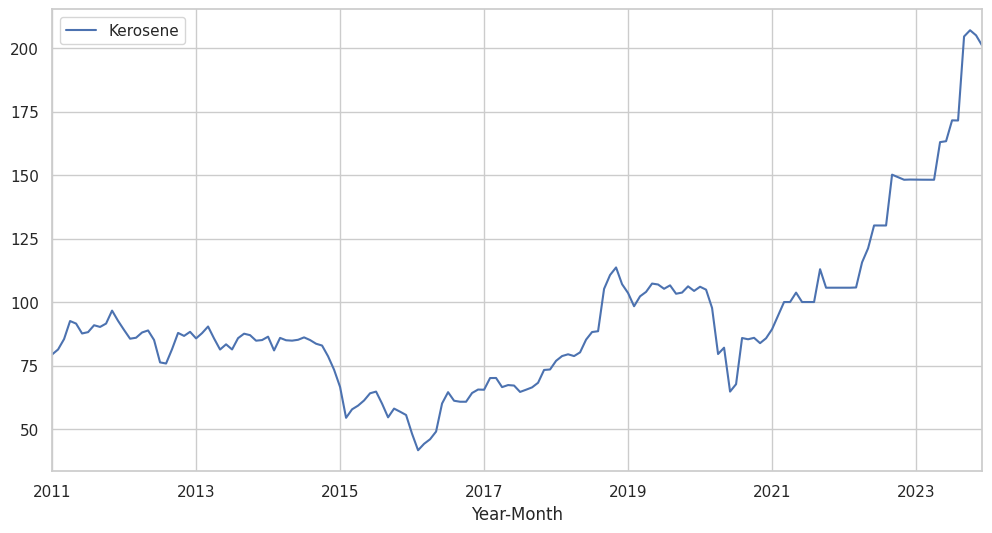

In [109]:
# Visualize the kerosene prices time series data
kerosene.plot(figsize=(12, 6))

plt.show()

Between 2011 and 2012, there was a steady increase in super fuel prices, escalating from 100 to 120. This upward trend was succeeded by a period of mild fluctuations in prices until 2015, when a significant decrease was observed. Prices began to recover from 2016 to 2017. Remarkably, post-2017, a persistent upward trajectory in fuel prices was noted, culminating at 120 in 2019. Although there was a decline in 2020, a significant surge in fuel prices commenced in 2021 and has been ongoing through 2023.

**Testing for trends/stationarity**

In [110]:
#DickeyFuller Test on kerosene

# Perform Dickey-Fuller test
result = adfuller(kerosene)

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# Compare p-value to a significance level to make a decision about stationarity
if p_value <= 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely non-stationary.')

Test Statistic: 1.5502347690634368
P-value: 0.9977003228945764
The time series is likely non-stationary.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The time series is not stationary as the P-value is higher than the significance level of 0.05. We will do differencing to try and make the time series stationary.

In [111]:
# Differencing the time series
diff = kerosene.diff().dropna()

# Perform ADF test on the differenced series
result_diff = adfuller(diff)

# Extract and print the test statistic and p-value
test_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]

print(f'Test Statistic (After Differencing): {test_statistic_diff}')
print(f'P-value (After Differencing): {p_value_diff}')

# Compare p-value to a significance level to make a decision about stationarity
if p_value_diff <= 0.05:
    print('The differenced time series is likely stationary.')
else:
    print('The differenced time series is likely non-stationary.')

Test Statistic (After Differencing): -11.088884505707266
P-value (After Differencing): 4.129912546552388e-20
The differenced time series is likely stationary.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The timeseries is now stationary

**Plotting PACF & ACF**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


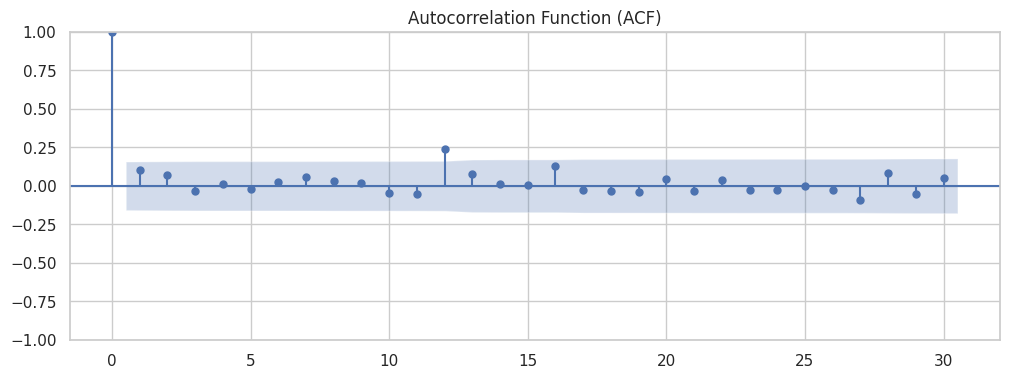

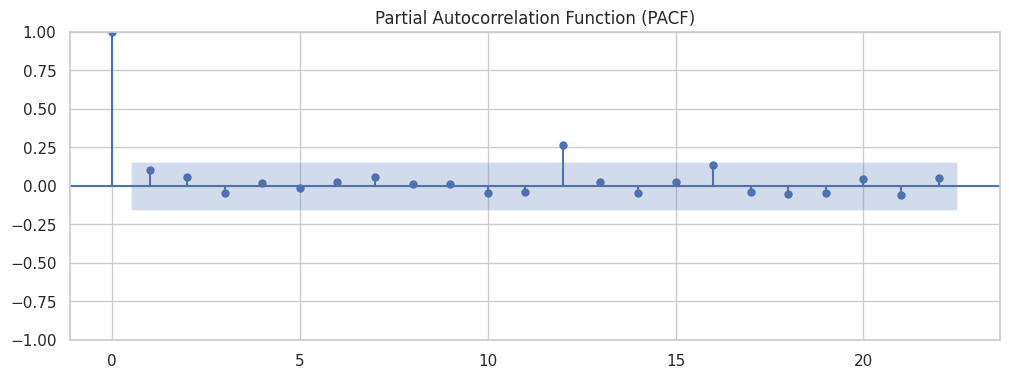

In [112]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(diff, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(diff, lags=22, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [113]:
diff.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kerosene
Year-Month          
2011-02-01  1.973656
2011-03-01  4.098500
2011-04-01  7.091636
2011-05-01 -0.999378
2011-06-01 -3.894552

In [114]:
kerosene_df=diff
kerosene_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kerosene
Year-Month          
2011-02-01  1.973656
2011-03-01  4.098500
2011-04-01  7.091636
2011-05-01 -0.999378
2011-06-01 -3.894552

In [115]:
kerosene_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kerosene    0
dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


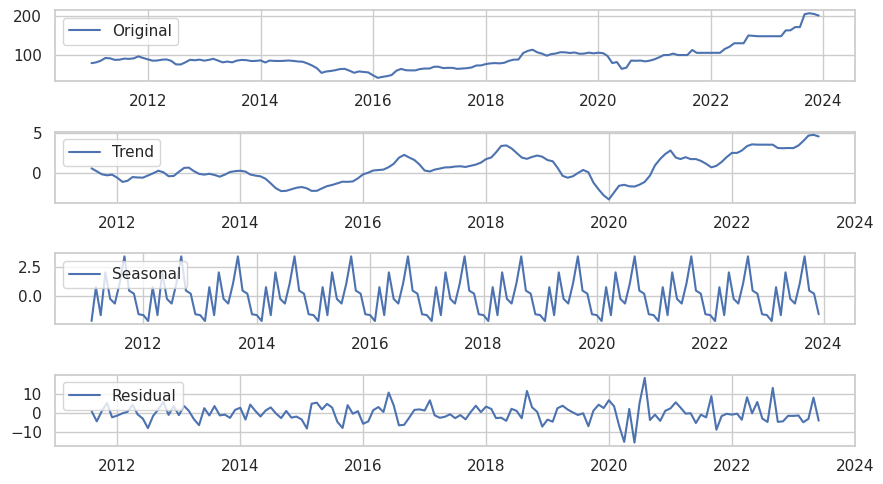

In [116]:
# Decomposition for Kerosene Prices with a 12-month period
tsd_result = seasonal_decompose(kerosene_df['Kerosene'], model='additive', period=12)

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(9, 5))
plt.subplot(4, 1, 1)
plt.plot(kerosene, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(tsd_result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(tsd_result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(tsd_result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In the seasonal component there is are periodic patterns therefore suggesting the presence of seasonality in the time series.

**Upsampling from monthly to daily**

In [117]:
# Ensure the index is a DatetimeIndex
kerosene_df.index = pd.to_datetime(kerosene_df.index)

# Upsampling the dataset from monthly to daily frequency
kerosene_df_daily = kerosene_df.resample('D').interpolate(method='linear')

In [118]:
kerosene_df_daily.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kerosene
Year-Month          
2011-02-01  1.973656
2011-02-02  2.049544
2011-02-03  2.125431
2011-02-04  2.201318
2011-02-05  2.277205
2011-02-06  2.353093
2011-02-07  2.428980
2011-02-08  2.504867
2011-02-09  2.580755
2011-02-10  2.656642

In [119]:
kerosene_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4687 entries, 2011-02-01 to 2023-12-01
Freq: D
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Kerosene  4687 non-null   float64
dtypes: float64(1)
memory usage: 73.2 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
from sklearn.model_selection import train_test_split

# Splitting the upsampled data into train and test sets
train_kerosene_daily, test_kerosene_daily = train_test_split(kerosene_df_daily, test_size=0.2, shuffle=False)

# Displaying the first few rows of the upsampled dataset and the splits
kerosene_df_daily.head(), train_kerosene_daily.head(), test_kerosene_daily.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(            Kerosene
 Year-Month          
 2011-02-01  1.973656
 2011-02-02  2.049544
 2011-02-03  2.125431
 2011-02-04  2.201318
 2011-02-05  2.277205,
             Kerosene
 Year-Month          
 2011-02-01  1.973656
 2011-02-02  2.049544
 2011-02-03  2.125431
 2011-02-04  2.201318
 2011-02-05  2.277205,
             Kerosene
 Year-Month          
 2021-05-08  2.028960
 2021-05-09  1.790255
 2021-05-10  1.551551
 2021-05-11  1.312846
 2021-05-12  1.074142)

# ARIMA

**Best ARIMA Order**

In [121]:
#Best ARIMA order

from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define a range of p, d, and q values to try
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

best_aic = np.inf
best_order = None

# Trying different combinations of p, d, and q
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(kerosene_df_daily['Kerosene'], order=(p, d, q))
                model_fit = model.fit()
                print(f'ARIMA({p},{d},{q}) - AIC:{model_fit.aic}')

                # Check if this model has the lowest AIC
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, d, q)
            except:
                continue

print('Best ARIMA order:', best_order)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ARIMA(0,0,0) - AIC:27915.40726374747


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0,0,1) - AIC:21476.76733923175


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0,0,2) - AIC:15462.501801273724


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0,0,3) - AIC:10424.929011702257
ARIMA(0,1,0) - AIC:295.71648078921976
ARIMA(0,1,1) - AIC:-4295.707675174059
ARIMA(0,1,2) - AIC:-6762.885116088255
ARIMA(0,1,3) - AIC:-8112.86489073285
ARIMA(1,0,0) - AIC:302.0317802038562
ARIMA(1,0,1) - AIC:-4290.0855669699695
ARIMA(1,0,2) - AIC:-6758.465652540288
ARIMA(1,0,3) - AIC:-8109.972857868683
ARIMA(1,1,0) - AIC:-10737.344433106526
ARIMA(1,1,1) - AIC:-10738.103998257635
ARIMA(1,1,2) - AIC:-10738.845495265072
ARIMA(1,1,3) - AIC:-10739.540681165287
ARIMA(2,0,0) - AIC:-10859.35825018706


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,0,1) - AIC:-10857.39652398401
ARIMA(2,0,2) - AIC:-10855.408458040074
ARIMA(2,0,3) - AIC:-10853.409038710637
ARIMA(2,1,0) - AIC:-10738.251906890338


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2,1,1) - AIC:-10733.819929742578


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2,1,2) - AIC:-10734.619043680203


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2,1,3) - AIC:-10735.395234062897
ARIMA(3,0,0) - AIC:-10857.396391387498
ARIMA(3,0,1) - AIC:-10855.379527567025
ARIMA(3,0,2) - AIC:-10853.40811261477


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,0,3) - AIC:-10716.020042389267
ARIMA(3,1,0) - AIC:-10739.309339278574
ARIMA(3,1,1) - AIC:-10735.769109189789


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3,1,2) - AIC:-10730.686716853535


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3,1,3) - AIC:-10731.366532836526
Best ARIMA order: (2, 0, 0)


**Building ARIMA Model**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                               SARIMAX Results                                
Dep. Variable:               Kerosene   No. Observations:                 3749
Model:                 ARIMA(2, 0, 0)   Log Likelihood                5277.342
Date:                Tue, 30 Jan 2024   AIC                         -10546.683
Time:                        07:03:07   BIC                         -10521.766
Sample:                    02-01-2011   HQIC                        -10537.822
                         - 05-07-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1778      0.431      0.413      0.680      -0.666       1.022
ar.L1          1.9529      0.007    280.144      0.000       1.939       1.967
ar.L2         -0.9553      0.007   -137.083      0.0

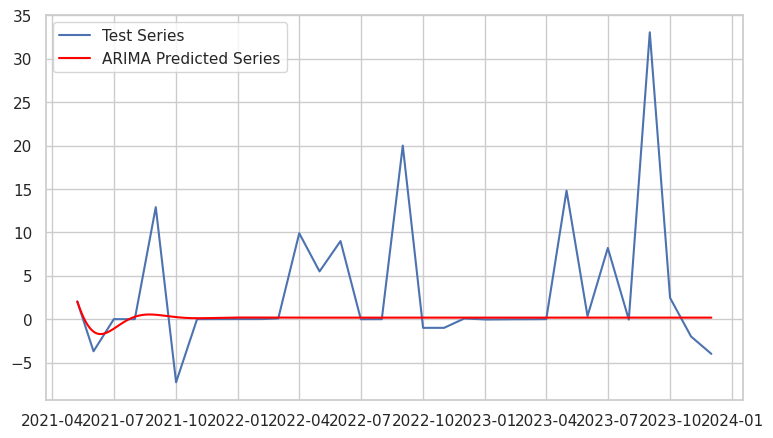

In [122]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Set best order as the values obtained
best_order = (2, 0, 0)

# Fit ARIMA model with the best orders on train set
arima_model = ARIMA(train_kerosene_daily, order=best_order)
arima_fit = arima_model.fit()

# Display the summary of the model
print(arima_fit.summary())

# Determine the number of observations for the forecast
forecast_length = len(test_kerosene_daily)

# Forecast using the ARIMA model
arima_pred = arima_fit.predict(start=len(train_kerosene_daily), end=len(train_kerosene_daily) + forecast_length - 1, dynamic=False)

# Calculate MAE and RMSE
mae_arima = mean_absolute_error(test_kerosene_daily, arima_pred)
rmse_arima = np.sqrt(mean_squared_error(test_kerosene_daily, arima_pred))
print("\n")
print(f"ARIMA Model - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")

# Plot forecasts against actual outcomes
plt.figure(figsize=(9, 5))
plt.plot(test_kerosene_daily, label='Test Series')
plt.plot(test_kerosene_daily.index, arima_pred, color='red', label='ARIMA Predicted Series')
plt.legend()
plt.show()

An MAE of 4.04 suggests that, on average, the forecast of your ARIMA model deviates from the actual values by 4.04 units. The RMSE of 6.92 implies a larger error magnitude than the MAE (since RMSE gives more weight to larger errors).

**Hypertuning ARIMA using GridSearch**

In [123]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings

# Define the p, d, and q ranges
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

best_aic = float('inf')
best_pdq = None
best_model = None

warnings.filterwarnings("ignore") # Ignore convergence warnings

# Grid search over pdq combinations
for param in pdq:
    try:
        temp_model = ARIMA(train_kerosene_daily, order=param)
        results = temp_model.fit()

        # Check if this model's AIC is lower than the current best
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

warnings.resetwarnings()

print(f'Best ARIMA Model: ARIMA{best_pdq} - AIC:{best_aic}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best ARIMA Model: ARIMA(2, 0, 0) - AIC:-10546.683357523203


After hypertuning using GridSearch our best ARIMA Model is still (2,0,0)

# SARIMA

**Best SARIMA Order**

In [124]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

# Define the range for p, d, q, P, D, Q, and the seasonal period S
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 12  # Assuming a monthly seasonality, change this as per your data

# Generate all combinations of SARIMA parameters
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(P, D, Q))]

best_aic = float('inf')
best_pdq = None
best_seasonal_pdq = None
best_model = None

warnings.filterwarnings("ignore")  # Ignore convergence warnings

# Grid search for the optimal SARIMA parameters
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            temp_model = SARIMAX(train_kerosene_daily,
                                 order=param,
                                 seasonal_order=seasonal_param,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # Compare this model's AIC with the best so far
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = seasonal_param
                best_model = results
        except:
            continue

warnings.resetwarnings()

print(f'Best SARIMA Model: SARIMA{best_pdq}x{best_seasonal_pdq} - AIC:{best_aic}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best SARIMA Model: SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:-10456.911688316919


**Building SARIMA Model**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SARIMA Model - MAE: 6.10, RMSE: 8.61


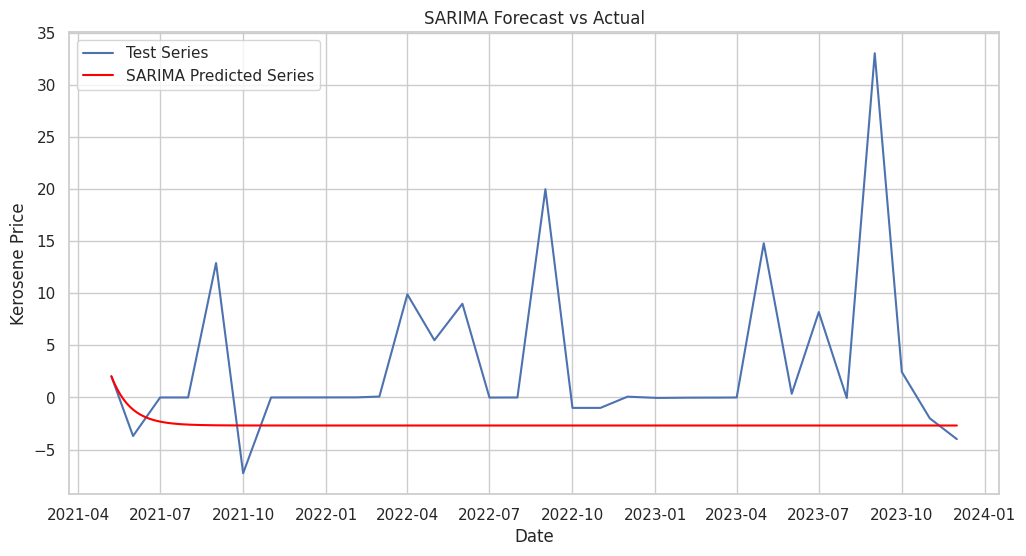

In [125]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Fitting the SARIMA model with the identified best order
best_order = (1, 1, 0)
best_seasonal_order = (0, 0, 0, 12)
sarima_model = SARIMAX(train_kerosene_daily['Kerosene'],
                       order=best_order,
                       seasonal_order=best_seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_fit = sarima_model.fit()

# Forecasting
sarima_forecast = sarima_fit.forecast(steps=len(test_kerosene_daily))

# Calculate MAE and RMSE
mae_sarima = mean_absolute_error(test_kerosene_daily, sarima_forecast)
rmse_sarima = np.sqrt(mean_squared_error(test_kerosene_daily, sarima_forecast))

# Display the evaluation metrics
print(f"SARIMA Model - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}")

# Plot forecasts against actual outcomes
plt.figure(figsize=(12, 6))
plt.plot(test_kerosene_daily, label='Test Series')
plt.plot(sarima_forecast, color='red', label='SARIMA Predicted Series')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Kerosene Price')
plt.legend()
plt.show()

This value indicates that, on average, the predictions of the SARIMA model are about 6.10 units away from the actual values. The RMSE value being 8.61 suggests that the model's predictions typically deviate from the actual values by about 8.61 units, on average.

Both MAE and RMSE are lower for the ARIMA model compared to the SARIMA model, indicating that the ARIMA model generally performs better in this instance.

**Hypertuning SARIMA using GridSearch**

In [126]:
import itertools
import numpy as np
import warnings

# Assuming super_df_daily is your dataset and 'Super' is the target variable
#data = kerosene_df_daily['Kerosene']

# Define the range for p, d, q, P, D, Q, and the seasonal period S
#p = d = q = range(0, 3)  # Non-seasonal parameters
#P = D = Q = range(0, 3)  # Seasonal parameters
#s = 12  # Assuming a monthly seasonality, for yearly seasonality

#best_aic = float('inf')
#best_order = None
#best_seasonal_order = None

# Iterate over all combinations of SARIMA parameters
#for param in itertools.product(p, d, q):
    #for seasonal_param in itertools.product(P, D, Q):
        #try:
            #model = SARIMAX(data,
                            #order=param,
                            #seasonal_order=seasonal_param + (s,),
                            #enforce_stationarity=False,
                            #enforce_invertibility=False)
            #results = model.fit(disp=False)  # Set disp=False to reduce output

            #if results.aic < best_aic:
                #best_aic = results.aic
                #best_order = param
                #best_seasonal_order = seasonal_param
        #except:
            #continue

#print(f"Best SARIMA Model: Order={best_order}, Seasonal Order={best_seasonal_order} with AIC={best_aic}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# FaceBook Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjaoubn2i/o8rpngk1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjaoubn2i/e5e7wh9v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94824', 'data', 'file=/tmp/tmpjaoubn2i/o8rpngk1.json', 'init=/tmp/tmpjaoubn2i/e5e7wh9v.json', 'output', 'file=/tmp/tmpjaoubn2i/prophet_modelm2uy4r7c/prophet_model-20240130070708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model - MAE: 4.26, RMSE: 6.65


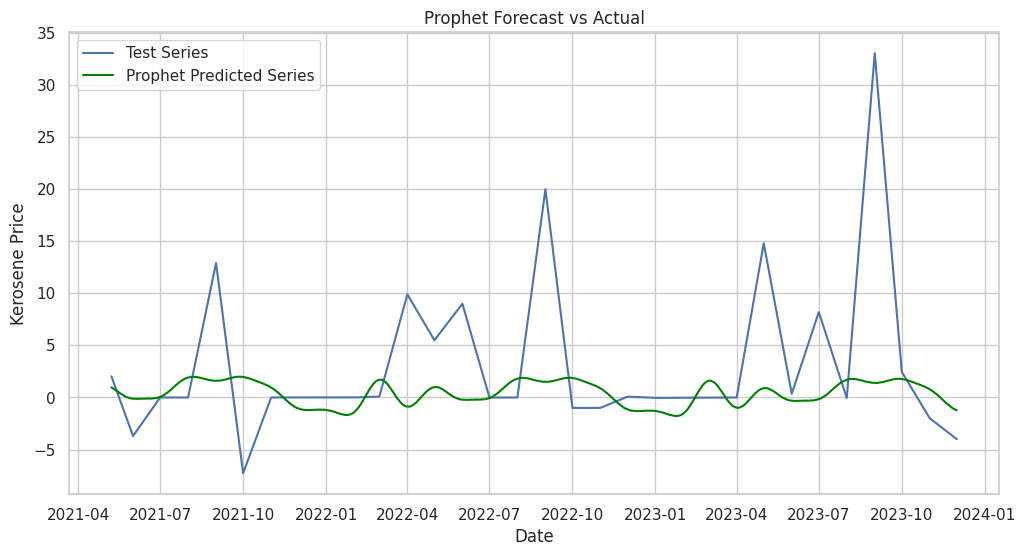

In [127]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data for Prophet
train_df = pd.DataFrame({'ds': train_kerosene_daily.index, 'y': train_kerosene_daily['Kerosene']})
test_df = pd.DataFrame({'ds': test_kerosene_daily.index})

# Create and fit the Prophet model
prophet_model_kerosene = Prophet()
prophet_model_kerosene.fit(train_df)

# Make predictions for the test data
future = prophet_model_kerosene.make_future_dataframe(periods=len(test_kerosene_daily))
forecast = prophet_model_kerosene.predict(future)

# Extract the forecasted values
prophet_forecast = forecast['yhat'][-len(test_kerosene_daily):]

# Calculate MAE and RMSE for Prophet
mae_prophet = mean_absolute_error(test_kerosene_daily, prophet_forecast)
rmse_prophet = np.sqrt(mean_squared_error(test_kerosene_daily, prophet_forecast))

# Display the evaluation metrics
print(f"Prophet Model - MAE: {mae_prophet:.2f}, RMSE: {rmse_prophet:.2f}")

# Plot Prophet's forecasts against actual outcomes
plt.figure(figsize=(12, 6))
plt.plot(test_kerosene_daily, label='Test Series')
plt.plot(test_kerosene_daily.index, prophet_forecast, color='green', label='Prophet Predicted Series')
plt.title('Prophet Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Kerosene Price')
plt.legend()
plt.show()

This value indicates that the average deviation of the Prophet model's predictions from the actual values is about 4.26 units. The RMSE for the Prophet model is 6.65, suggesting that the typical error in predictions is around this value.
The Prophet model has a slightly higher MAE but a marginally lower RMSE. This suggests that while the average error (MAE) is slightly higher for the Prophet model, it tends to have fewer large errors (lower RMSE) compared to the ARIMA model.

In summary, the Prophet model demonstrates a good balance between average accuracy (MAE) and the handling of larger errors (RMSE), outperforming SARIMA and showing comparable performance to ARIMA.

**Forecasting Prediction Comparison**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


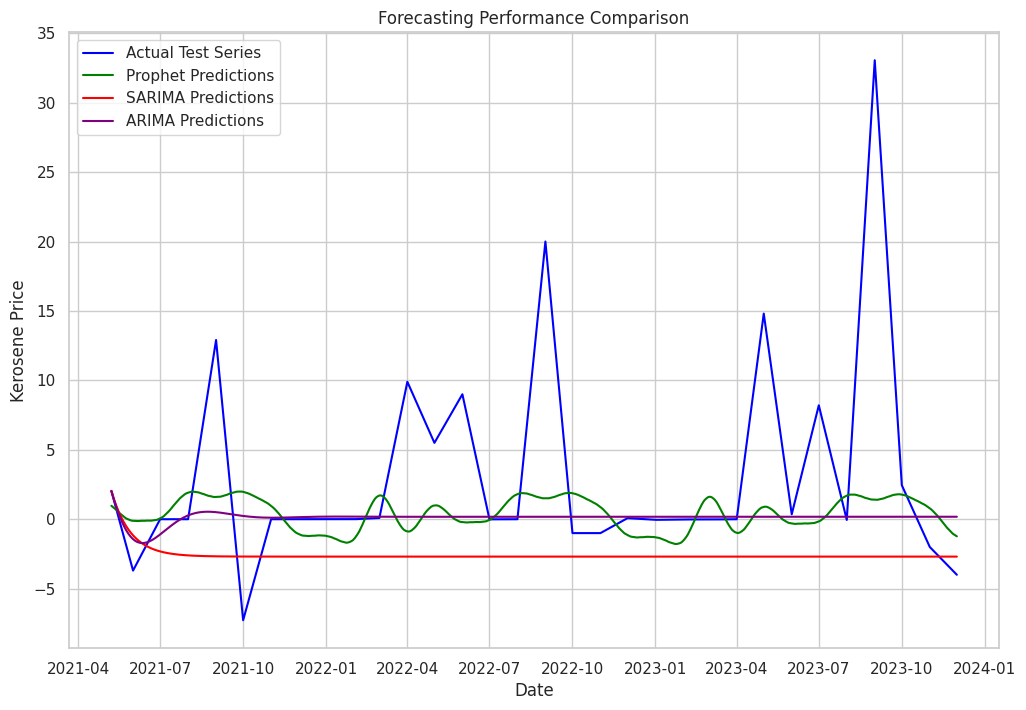

In [128]:
# Prepare the plot
plt.figure(figsize=(12, 8))

# Plotting the actual test data
plt.plot(test_kerosene_daily, label='Actual Test Series', color='blue')

# Plotting the forecasts
plt.plot(test_kerosene_daily.index, prophet_forecast, color='green', label='Prophet Predictions')
plt.plot(test_kerosene_daily.index, sarima_forecast, color='red', label='SARIMA Predictions')
plt.plot(test_kerosene_daily.index, arima_pred, color='purple', label='ARIMA Predictions')

# Adding plot labels and legend
plt.title('Forecasting Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Kerosene Price')
plt.legend()

# Display the plot
plt.show()

In [129]:
pip install tensorflow

# LSTM

Epoch 1/100
122/122 - 3s - loss: 0.0126 - 3s/epoch - 29ms/step
Epoch 2/100
122/122 - 0s - loss: 0.0105 - 222ms/epoch - 2ms/step
Epoch 3/100
122/122 - 0s - loss: 0.0098 - 210ms/epoch - 2ms/step
Epoch 4/100
122/122 - 0s - loss: 0.0105 - 307ms/epoch - 3ms/step
Epoch 5/100
122/122 - 0s - loss: 0.0096 - 260ms/epoch - 2ms/step
Epoch 6/100
122/122 - 0s - loss: 0.0099 - 209ms/epoch - 2ms/step
Epoch 7/100
122/122 - 0s - loss: 0.0096 - 199ms/epoch - 2ms/step
Epoch 8/100
122/122 - 0s - loss: 0.0103 - 217ms/epoch - 2ms/step
Epoch 9/100
122/122 - 0s - loss: 0.0086 - 204ms/epoch - 2ms/step
Epoch 10/100
122/122 - 0s - loss: 0.0087 - 204ms/epoch - 2ms/step
Epoch 11/100
122/122 - 0s - loss: 0.0105 - 209ms/epoch - 2ms/step
Epoch 12/100
122/122 - 0s - loss: 0.0087 - 201ms/epoch - 2ms/step
Epoch 13/100
122/122 - 0s - loss: 0.0094 - 206ms/epoch - 2ms/step
Epoch 14/100
122/122 - 0s - loss: 0.0088 - 215ms/epoch - 2ms/step
Epoch 15/100
122/122 - 0s - loss: 0.0089 - 214ms/epoch - 2ms/step
Epoch 16/100
122/122 

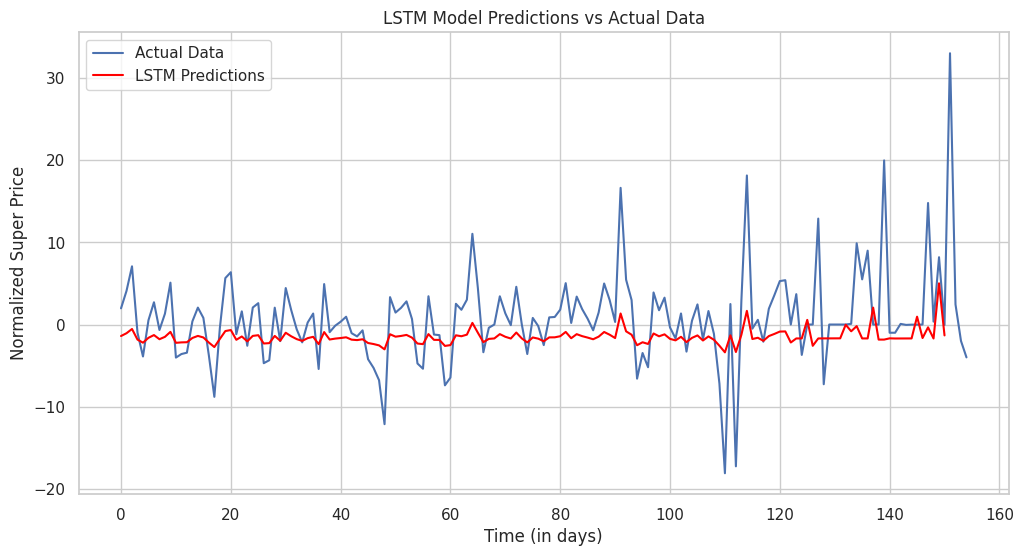

In [130]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Kerosene_df['Kerosene'] is the dataset
data = kerosene_df['Kerosene'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1
look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate root mean squared error and MAE
train_score_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
train_score_mae = mean_absolute_error(Y_train[0], train_predict[:,0])
test_score_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
test_score_mae = mean_absolute_error(Y_test[0], test_predict[:,0])

# Print evaluation metrics
print(f'Train RMSE: {train_score_rmse:.2f}, Train MAE: {train_score_mae:.2f}')
print(f'Test RMSE: {test_score_rmse:.2f}, Test MAE: {test_score_mae:.2f}')

# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data_scaled), label='Actual Data')
plt.plot(np.concatenate((train_predict, test_predict)), color='red', label='LSTM Predictions')
plt.title('LSTM Model Predictions vs Actual Data')
plt.xlabel('Time (in days)')
plt.ylabel('Normalized Super Price')
plt.legend()
plt.show()


The MAE of 4.83 signifies that, on average, the LSTM model's predictions are approximately 4.83 units away from the actual Kerosene prices in the test data. An RMSE of 8.88 suggests a larger average deviation of the model's predictions from the actual values.

The ARIMA and Facebook Prophet models appear to provide the best balance between average accuracy and handling of larger errors for forecasting Kerosene prices, with the Prophet model being slightly better at managing larger prediction errors.

# 5 year forecast of Kerosene Prices

We will use our best performing model Facebook prophet to predict super prices for the next 5 years.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


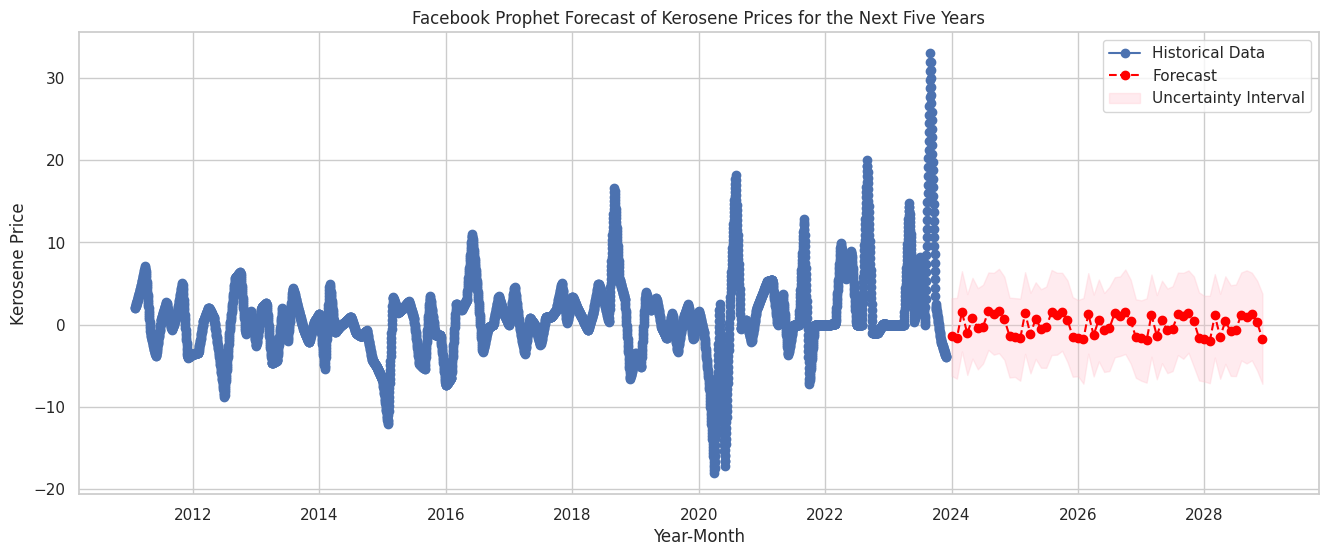

In [131]:
# Generate future dates for the next five years (60 months)
future_five_years = pd.DataFrame({'ds': pd.date_range(start=kerosene_df_daily.index[-1] + pd.DateOffset(months=1), periods=60, freq='MS')})

# Make predictions for the next five years
forecast_five_years = prophet_model_kerosene.predict(future_five_years)

# Plot the historical data and the forecast
plt.figure(figsize=(16, 6))
plt.plot(kerosene_df_daily.index, kerosene_df_daily['Kerosene'], label='Historical Data', marker='o')
plt.plot(forecast_five_years['ds'], forecast_five_years['yhat'], label='Forecast', linestyle='dashed', marker='o', color='red')
plt.fill_between(forecast_five_years['ds'], forecast_five_years['yhat_lower'], forecast_five_years['yhat_upper'],
                 color='pink', alpha=0.3, label='Uncertainty Interval')

plt.title('Facebook Prophet Forecast of Kerosene Prices for the Next Five Years')
plt.xlabel('Year-Month')
plt.ylabel('Kerosene Price')
plt.legend()
plt.show()

# DEPLOYMENT

In [132]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib

In [133]:
import streamlit as st
import joblib

In [135]:
# Save the models
joblib.dump(prophet_model_super, 'prophet_model_super.pkl')
joblib.dump(prophet_model_diesel, 'prophet_model_diesel.pkl')
joblib.dump(prophet_model_kerosene, 'prophet_model_kerosene.pkl')

['prophet_model_kerosene.pkl']

In [ ]:
import streamlit as st
import joblib
import pandas as pd

# Load the saved models
model_super = joblib.load('prophet_model_super.pkl')
model_diesel = joblib.load('prophet_model_diesel.pkl')
model_kerosene = joblib.load('prophet_model_kerosene.pkl')

# Streamlit app layout
st.title('EPRA Fuel Predictor')

# Date selection widget
selected_date = st.date_input("Select a date for fuel price prediction:")

# Function to make predictions
def make_prediction(model, future_date):
    future_df = pd.DataFrame({'ds': [future_date]})
    forecast = model.predict(future_df)
    return forecast['yhat'].iloc[0]

# Display predictions
if st.button('Predict Prices'):
    price_super = make_prediction(model_super, selected_date)
    price_diesel = make_prediction(model_diesel, selected_date)
    price_kerosene = make_prediction(model_kerosene, selected_date)

    st.write(f"Predicted Super Price on {selected_date}: {price_super:.2f}")
    st.write(f"Predicted Diesel Price on {selected_date}: {price_diesel:.2f}")
    st.write(f"Predicted Kerosene Price on {selected_date}: {price_kerosene:.2f}")

# Optionally, add code to display historical and forecasted plots

In [136]:
import streamlit as st
import joblib
import pandas as pd

# Load the saved models
model_super = joblib.load('prophet_model_super.pkl')
model_diesel = joblib.load('prophet_model_diesel.pkl')
model_kerosene = joblib.load('prophet_model_kerosene.pkl')

# Streamlit app layout
st.title('EPRA Fuel Predictor')

# Modified date selection widget for date range
selected_date_range = st.date_input("Select a date range for fuel price prediction:", [])

# Ensure the selected date range is appropriate
if selected_date_range:
    start_date, end_date = selected_date_range
    # Add your logic here to adjust start_date and end_date if needed

    # Function to make predictions
    def make_prediction(model, future_date):
        future_df = pd.DataFrame({'ds': [future_date]})
        forecast = model.predict(future_df)
        return forecast['yhat'].iloc[0]

    # Display predictions for the range
    if st.button('Predict Prices'):
        date = start_date
        while date <= end_date:
            price_super = make_prediction(model_super, date)
            price_diesel = make_prediction(model_diesel, date)
            price_kerosene = make_prediction(model_kerosene, date)

            st.write(f"Predicted Super Price on {date}: {price_super:.2f}")
            st.write(f"Predicted Diesel Price on {date}: {price_diesel:.2f}")
            st.write(f"Predicted Kerosene Price on {date}: {price_kerosene:.2f}")
            date += pd.Timedelta(days=1)

2024-01-30 07:09:54.873 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [137]:
!pip install streamlit
!pip install pyngrok

/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/pyngrok-7.0.5.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [138]:
from pyngrok import ngrok

# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
print('Public URL:', public_url)
!streamlit run project_5.py

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


ERROR:pyngrok.process.ngrok:t=2024-01-30T07:10:31+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=b8b397bd4d07 err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-01-30T07:10:31+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-01-30T07:10:31+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.co

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [142]:
from pyngrok import ngrok

# Install the ngrok authtoken
!ngrok authtoken 2bfGdXKaIHy35CZ3AXYhwU1NrpV_6YjjzfHfQQQodNuQV3UaV

# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
print('Public URL:', public_url)
!streamlit run project_5.py

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [143]:
from pyngrok import ngrok

# Install the ngrok authtoken
!ngrok authtoken 2bfGdXKaIHy35CZ3AXYhwU1NrpV_6YjjzfHfQQQodNuQV3UaV

# Setup a tunnel to the streamlit port 8501
# Note: The port is passed as an integer, not a string
public_url = ngrok.connect(port=8501)
print('Public URL:', public_url)
!streamlit run project_5.py

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [144]:
from pyngrok import ngrok

# Install the ngrok authtoken
!ngrok authtoken 2bfGdXKaIHy35CZ3AXYhwU1NrpV_6YjjzfHfQQQodNuQV3UaV

# Start Streamlit in the background on port 8501
!streamlit run project_5.py --server.port 8501 &

# Create an ngrok tunnel to the Streamlit port
public_url = ngrok.connect(port=8501)
print('Public URL:', public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: project_5.py


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [141]:
from pyngrok import ngrok

# Install the ngrok authtoken
!ngrok authtoken 2bfGdXKaIHy35CZ3AXYhwU1NrpV_6YjjzfHfQQQodNuQV3UaV

# Setup a tunnel to the streamlit port 8501 (as an integer, not a string)
public_url = ngrok.connect(port=8501)  # Here '8501' is changed to 8501
print('Public URL:', public_url)
!streamlit run your_script.py

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [ ]:
import streamlit as st
import joblib
import pandas as pd
from datetime import date, timedelta

# Load the saved models
model_super = joblib.load('prophet_model_super.pkl')
model_diesel = joblib.load('prophet_model_diesel.pkl')
model_kerosene = joblib.load('prophet_model_kerosene.pkl')

# Streamlit app layout
st.title('EPRA Fuel Predictor')

# Date selection widget
#selected_date = st.date_input("Select a date for fuel price prediction:")

# Default date range for the current month
start_date = date.today().replace(day=1)
end_date = start_date + timedelta(days=30)

# Date range selection widget
selected_date_range = st.date_input("Select a date range for fuel price prediction:",
                                    value=(start_date, end_date),
                                    min_value=start_date,
                                    max_value=end_date)

def make_predictions(model, start_date, end_date):
    future_dates = pd.date_range(start=start_date, end=end_date).to_pydatetime().tolist()
    future_df = pd.DataFrame({'ds': future_dates})
    forecast = model.predict(future_df)
    return forecast[['ds', 'yhat']]

def plot_price_predictions(forecasts, fuel_types):
    plt.figure(figsize=(10, 6))
    for forecast, fuel_type in zip(forecasts, fuel_types):
        plt.plot(forecast['ds'], forecast['yhat'], label=f'{fuel_type} Price Prediction')


if st.button('Predict Prices'):
    forecast_super = make_predictions(model_super, *selected_date_range)
    forecast_diesel = make_predictions(model_diesel, *selected_date_range)
    forecast_kerosene = make_predictions(model_kerosene, *selected_date_range)

    st.write("Predicted Fuel Prices:")
    st.write(f"Super: {forecast_super}")
    st.write(f"Diesel: {forecast_diesel}")
    st.write(f"Kerosene: {forecast_kerosene}")






# Function to make predictions
#def make_prediction(model, future_date):
    #future_df = pd.DataFrame({'ds': [future_date]})
    #forecast = model.predict(future_df)
    #return forecast['yhat'].iloc[0]

# Display predictions
#if st.button('Predict Prices'):
    #price_super = make_prediction(model_super, selected_date)
    #price_diesel = make_prediction(model_diesel, selected_date)
    #price_kerosene = make_prediction(model_kerosene, selected_date)

    #st.write(f"Predicted Super Price on {selected_date}: {price_super:.2f}")
    #st.write(f"Predicted Diesel Price on {selected_date}: {price_diesel:.2f}")
    #st.write(f"Predicted Kerosene Price on {selected_date}: {price_kerosene:.2f}")

# Optionally, add code to display historical and forecasted plots

In [ ]:
from datetime import date, timedelta
import streamlit as st
import joblib
import pandas as pd

In [ ]:
# Load the saved models
model_super = joblib.load('prophet_model_super.pkl')
model_diesel = joblib.load('prophet_model_diesel.pkl')
model_kerosene = joblib.load('prophet_model_kerosene.pkl')

In [ ]:
# Streamlit app layout
st.title('EPRA Fuel Predictor')

# Default date range for the current month
start_date = date.today().replace(day=1)
end_date = start_date + timedelta(days=30)

# Date range selection widget
selected_date_range = st.date_input("Select a date range for fuel price prediction:",
                                    value=(start_date, end_date),
                                    min_value=start_date,
                                    max_value=end_date)

In [ ]:
def make_predictions(model, start_date, end_date):
    future_dates = pd.date_range(start=start_date, end=end_date).to_pydatetime().tolist()
    future_df = pd.DataFrame({'ds': future_dates})
    forecast = model.predict(future_df)
    return forecast[['ds', 'yhat']]

In [ ]:
if st.button('Predict Prices'):
    forecast_super = make_predictions(model_super, *selected_date_range)
    forecast_diesel = make_predictions(model_diesel, *selected_date_range)
    forecast_kerosene = make_predictions(model_kerosene, *selected_date_range)

    st.write("Predicted Fuel Prices:")
    st.write("Super:")
    st.write(forecast_super)
    st.write("Diesel:")
    st.write(forecast_diesel)
    st.write("Kerosene:")
    st.write(forecast_kerosene)

In [ ]:
if st.button('Predict Prices'):
    # Ensure that the date range is valid (start_date should be before end_date)
    if selected_date_range[0] < selected_date_range[1]:
        forecast_super = make_predictions(model_super, *selected_date_range)
        forecast_diesel = make_predictions(model_diesel, *selected_date_range)
        forecast_kerosene = make_predictions(model_kerosene, *selected_date_range)

        # Display predictions in a nicer format
        st.write("Predicted Fuel Prices:")
        st.subheader("Super:")
        st.dataframe(forecast_super.set_index('ds'))
        st.subheader("Diesel:")
        st.dataframe(forecast_diesel.set_index('ds'))
        st.subheader("Kerosene:")
        st.dataframe(forecast_kerosene.set_index('ds'))
    else:
        st.error("Invalid date range selected. Please ensure the start date is before the end date.")

In [ ]:
!pip show pandas